In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 

from IPython.display import display

import matplotlib.pyplot as plt

import seaborn as sns

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных:-" data-toc-modified-id="Описание-данных:--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных: <a class="anchor" id="first-bullet"></a></a></span></li><li><span><a href="#Осмотр-данных" data-toc-modified-id="Осмотр-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Осмотр данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вспомогательные-функции" data-toc-modified-id="Вспомогательные-функции-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вспомогательные функции</a></span></li><li><span><a href="#Осмотр-пропусков" data-toc-modified-id="Осмотр-пропусков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Осмотр пропусков</a></span><ul class="toc-item"><li><span><a href="#Выводы-из-осмотра-пропусков:" data-toc-modified-id="Выводы-из-осмотра-пропусков:-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Выводы из осмотра пропусков:</a></span></li></ul></li><li><span><a href="#Проверка-распределений-'last_price'-и-'total_area'" data-toc-modified-id="Проверка-распределений-'last_price'-и-'total_area'-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка распределений 'last_price' и 'total_area'</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#Вывод-после-заполнения-пропусков" data-toc-modified-id="Вывод-после-заполнения-пропусков-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Вывод после заполнения пропусков</a></span></li></ul></li></ul></li><li><span><a href="#Добавление-данных-в-таблицу" data-toc-modified-id="Добавление-данных-в-таблицу-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Добавление данных в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных: <a class="anchor" id="first-bullet"></a>

|Column name|Description|
|:---|:---|
|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|
|balcony|число балконов|
|ceiling_height|высота потолков (м)|
|cityCenters_nearest|расстояние до центра города (м)|
|days_exposition|сколько дней было размещено объявление (от публикации до снятия)|
|first_day_exposition|дата публикации|
|floor|этаж|
|floors_total|всего этажей в доме|
|is_apartment|апартаменты (булев тип)|
|kitchen_area|площадь кухни в квадратных метрах (м²)|
|last_price|цена на момент снятия с публикации|
|living_area|жилая площадь в квадратных метрах(м²)|
|locality_name|название населённого пункта|
|open_plan|свободная планировка (булев тип)|
|parks_around3000|число парков в радиусе 3 км|
|parks_nearest|расстояние до ближайшего парка (м)|
|ponds_around3000|число водоёмов в радиусе 3 км|
|ponds_nearest|расстояние до ближайшего водоёма (м)|
|rooms|число комнат|
|studio|квартира-студия (булев тип)|
|total_area|площадь квартиры в квадратных метрах (м²)|
|total_images|число фотографий квартиры в объявлении|

*Пояснение*: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Осмотр данных

Теперь давайте посмотрим на наш набор данных и общую информацию о нем.

In [3]:
start_data = pd.read_csv('real_estate_data.csv', sep='\t')
display(start_data.head())
print(start_data.info(), '\n')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Вывод

Беглое изучение показывает что данные в таблице заполненны крайне неравномерно, для некоторых столбцов не соответствует формат данных. Надо взглянуть на каждый столбец отдельно, чтобы лучше понимать какие с ним есть проблеммы и что нам нужно препринять для их устранения. 

### Предобработка данных

В самом начале отложим в сторонку столбцы, которые нам абсолютно бесполезны исходя из условий задачи поставленной заказчиком:
- `airports_nearest`
- `parks_around3000`
- `parks_nearest`
- `ponds_around3000`
- `ponds_nearest`
- `open_plan`

Возможно, позже вернемся к ним, чтобы найти дополнительные корреляции.

In [4]:
usseless_columns = start_data[
    ['airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'open_plan']
].copy()

In [5]:
start_data.drop(
    columns=['airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'open_plan'],
    inplace=True
)

#### Вспомогательные функции

Напишем функцию, которая на вход будет принимать столбец из датасета, и выводить информацию о нем (она пригодится нам дальше):
- если тип данных в столбце `object` то мы будем выводить уникальные значения этого столбца,
- в противном случае будем смотреть распределение значений с помощью гистограммы и диаграммы распределения.

In [6]:
def histogram_boxplot(data,
                      xlabel=None,
                      title=None,
                      font_scale=1,
                      figsize=(16, 8),
                      bins=None):
    """ Диграмма размаха и гистограмма будут отрисованны вместе на одном кадре. 
    На графиках будут также нарисованны линия среднего и медианы.
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 1)
    figsize: size of fig (default (16, 8))
    bins: number of bins (default None / auto)
    """
    
    sns.set(font_scale=font_scale)
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        2,
        sharex=True,
        gridspec_kw={"height_ratios": (.15, .85)},
        figsize=figsize
    )
    sns.boxplot(x=data, ax=ax_box2)
    
    if bins:
        sns.histplot(x=data, ax=ax_hist2, bins=bins, kde=True)
    else:
        sns.histplot(data, ax=ax_hist2, kde=True)

    plt.axvline(x=data.mean(), linewidth=2, color='r', label="mean", alpha=0.8)
    plt.axvline(x=data.median(),
                linewidth=2,
                color='y',
                label="median",
                alpha=0.8)
    ax_hist2.legend()

    if xlabel:
        ax_hist2.set(xlabel=xlabel)
    if title:
        ax_box2.set(title=title)
    plt.show()    

Пару функций для вывода графиков.

In [7]:
def several_hists(df, 
                  x, 
                  hue=None,
                  xlabel=None,
                  title=None,
                  font_scale=1,
                  figsize=(16, 8),
                  bins=None,
                  hue_order=None, 
                  stat='count'):
    
    """Функция выводит график на котором отображается распределение величины из датасета по категориям."""
    
    fig, ax = plt.subplots(sharex=True, figsize=figsize)
    sns.histplot(df, x=x, hue=hue, bins=bins, hue_order=hue_order, stat=stat)
    
    plt.axvline(x=df[x].mean(), linewidth=2, color='r', label="mean", alpha=0.8)
    plt.axvline(x=df[x].median(),
                linewidth=2,
                color='y',
                label="median",
                alpha=0.8)

In [8]:
def info_row(row, data, bins=None):
    
    '''Функция смотри тип данных в столбце:
    - если тип object, то смотрит уникальные значения
    - в противном случае оценивается распределение'''
    
    if row.dtype == 'object':
        
        print(row.name)
        print(row.unique())
        print()
        print(row.describe())
        print()
        
    else:
        bins=bins
        print(row.name)
        print(row.describe())
        histogram_boxplot(row, xlabel=row.name, title = 'Распределение '+ row.name)        

Еще нам понадобится функция, которой будем пользоваться в будущем для проверки корреляций значений в нашем датасете.

In [9]:
def correlation(dataframe):
    
    corr = dataframe.corr()

    f, ax = plt.subplots(figsize=(16, 12))
    
    sns.heatmap(
        corr, 
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values,
        annot=True,
        fmt = '.2f',
        annot_kws={'size':14},    
    )
    sns.set(font_scale=1.2)
    display(corr)

In [10]:
def show_na(df):
    '''
    Функция возвращает таблицу с количеством пропущенных значений по столбцам в процентах и абсолютном значении.
    '''
    data_info = (df.isna() | df.isnull()).sum()
    result_table = (pd.concat(
        [(data_info / df.shape[0] * 100).round(2), data_info], 
        axis=1,  
        keys=['missed percent', 'missed count']).sort_values('missed percent', ascending=False))
    return result_table

In [11]:
INITIAL_DF_SIZE = len(start_data.last_price)

#### Осмотр пропусков

In [12]:
show_na(start_data)

,missed percent,missed count
is_apartment,88.29,20924
balcony,48.61,11519
ceiling_height,38.80,9195
cityCenters_nearest,23.29,5519
days_exposition,13.42,3181
kitchen_area,9.61,2278
living_area,8.03,1903
floors_total,0.36,86
locality_name,0.21,49
total_images,0.00,0


Давайте составим таблицу, в которую запишем назвнаие столбцов, где пропущенны данные, сколько значений у нас есть и сколько пропущенно.

|Название столбца:|Количество строк в столбце:|Тип данных:|Количество пустых строк:|
|:---|:--:|:--:|---:|
|ceiling_height|14504|non-null float64|9195|
|floors_total|23613|non-null float64|86|
|living_area|21796|non-null float64|1903|
|is_apartment|2775|non-null object|20924|
|kitchen_area|21421|non-null float64|2278|
|balcony|12180|non-null float64|11519|
|locality_name|23650|non-null object|49|
|cityCenters_nearest|18180|non-null float64|5519|
|days_exposition|20518|non-null float64|3181|

##### Выводы из осмотра пропусков:
- Довольно много людей не указали высоту потолков, но для решения наших задач эти данные не нужны. 
- Этажность не указана для малого числа объявлений. Логично предположить, что это одноэтажные частные дома. Все пропуски будем менять на 1.
- Для  ~10% объявлений не указана жилая площадь помещения. Возможно эти пропуски сможем обработать основываясь на данных о количестве комнат и общей площади помещения (эти данные есть для всего датасета).
- Из описания следует, что `is_appartment` должен иметь булевые значения, заполним пропуски значениями `False` и значит сменим тип данных
- Размеры кухни не указали так же в ~10% случаев. Обрабатывать будем после того, как разберемся с данными по жилой площади.
- Отсутствие количества балконов будем менять на 0, нет данных - нет балконов.
- В столбце с названием населенного пункта 49 пропусков. Можно попробовать востановить данные основываясь на данных о растояниях до центра и до аэропортов. Так же надо будет попробовать перебрать значения и убедится, что у нас останутся только уникальные. Можно отбросить все кроме самого названия.
- Расстояние до центра нам будет интересовать только для Санкт-Петербурга. Позже посмотрим этот столбец внимательно.
- Время размещения отсутствует для более чем трех тысяч строк - наверно эти квартиры не были проданы на момент выгрузки. Заполнять эти значения мы ничем не будем, так как иначе это исказит наши выводы.


Пойдем по сложности решения проблем, но возможно иногда будем возвращаться к ранее обработанным столбцам, чтобы скорректировать значения в них.

#### Проверка распределений 'last_price' и 'total_area'
Давайте посмотрим на распределение самых интересных для нашего анализа значений.

last_price
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


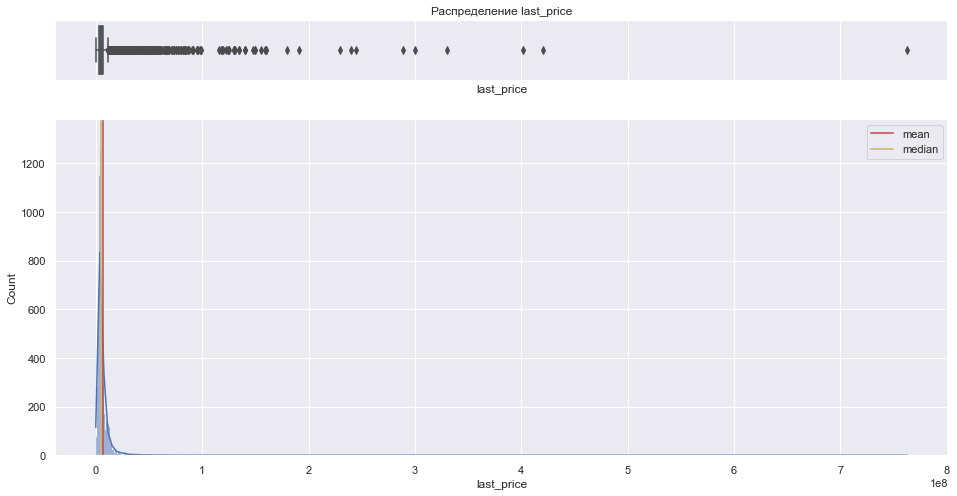

In [13]:
info_row(start_data['last_price'], start_data)

total_area
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


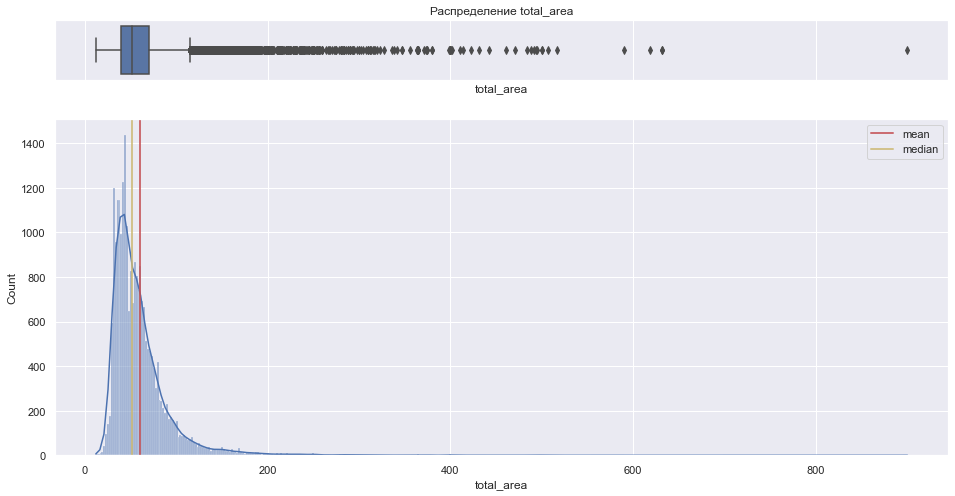

In [14]:
info_row(start_data['total_area'], start_data)

В обоих случаях есть большие выбросы справа. Отрежем эти хвосты чтобы исключить их влияиние. Отрезать будем по 99 перцентилю.

In [15]:
price_99_procentile = start_data['last_price'].quantile(.99)
area_99_procentile = start_data['total_area'].quantile(.99)

last_price
count    2.333300e+04
mean     5.735611e+06
std      4.104706e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      3.595350e+07
Name: last_price, dtype: float64


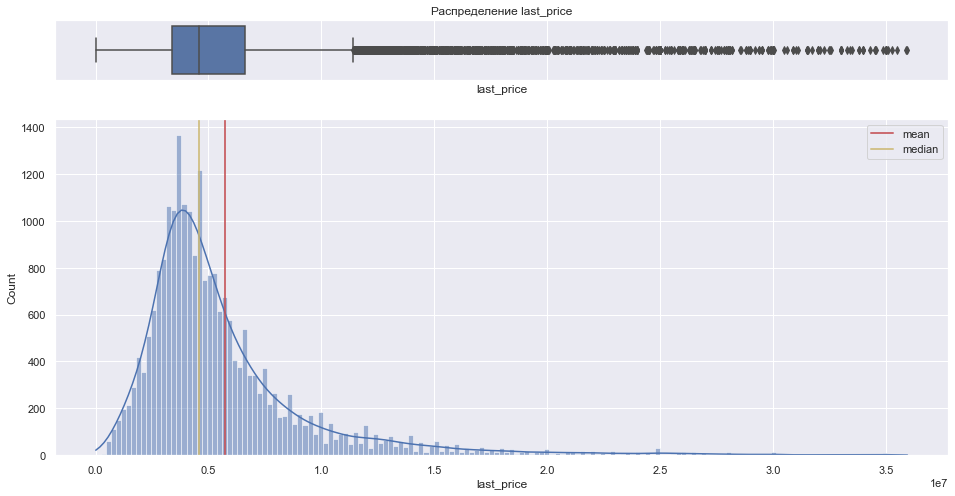

total_area
count    23333.000000
mean        57.631694
std         25.524366
min         12.000000
25%         40.000000
50%         51.400000
75%         68.100000
max        197.200000
Name: total_area, dtype: float64


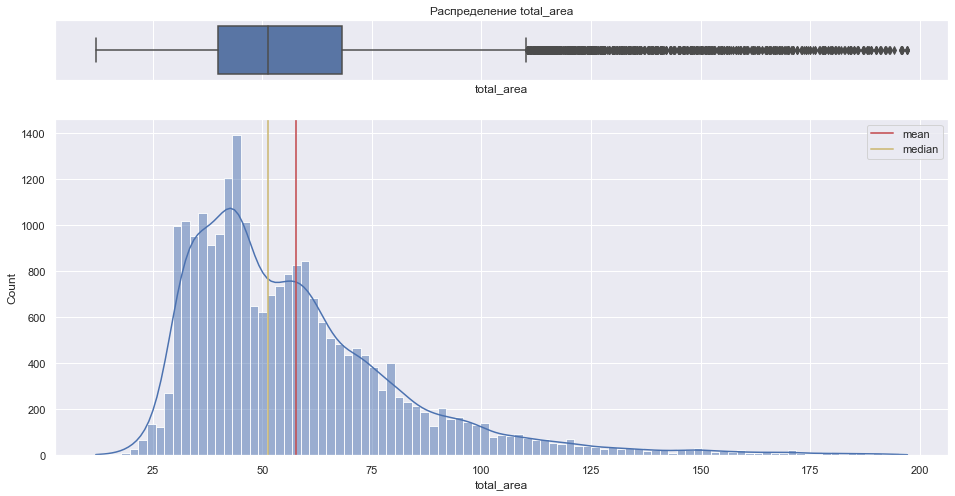

In [16]:
start_data = start_data.query('last_price < @price_99_procentile and total_area < @area_99_procentile')
info_row(start_data['last_price'], start_data)
info_row(start_data['total_area'], start_data)

In [17]:
start_data.reset_index(inplace=True)
print(start_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23333 entries, 0 to 23332
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23333 non-null  int64  
 1   total_images          23333 non-null  int64  
 2   last_price            23333 non-null  float64
 3   total_area            23333 non-null  float64
 4   first_day_exposition  23333 non-null  object 
 5   rooms                 23333 non-null  int64  
 6   ceiling_height        14271 non-null  float64
 7   floors_total          23248 non-null  float64
 8   living_area           21474 non-null  float64
 9   floor                 23333 non-null  int64  
 10  is_apartment          2734 non-null   object 
 11  studio                23333 non-null  bool   
 12  kitchen_area          21097 non-null  float64
 13  balcony               11994 non-null  float64
 14  locality_name         23284 non-null  object 
 15  cityCenters_nearest

Мы отрезали аномальные значения, которые могли в будущем исказить наши выводы. Для общей оценки рынка недвижимости важнее иметь данные о более распространненых типах квартир, чем о тех, что стоят сотни миллионов. Возможно впереди нам придется обрезать еще аномальные значения в результате анализа других столбцов.

#### Обработка пропусков
Займемся этажностью `floors_total`. Заменим все пропуски на 1 методом `fillna()`.

In [18]:
print('В столбце содержится {} пропущенных значений'.format(start_data['floors_total'].isnull().sum()))

start_data['floors_total'].fillna(1, inplace=True)

print('В столбце осталось {} пропущенных значений'.format(start_data['floors_total'].isnull().sum()))

В столбце содержится 85 пропущенных значений
В столбце осталось 0 пропущенных значений


Изменим тип столбца на `int` - не думаю, что количество этажей в здании может быть дробным.

In [19]:
start_data['floors_total'] = start_data['floors_total'].astype('int')

Займемся пропусками в столбце `is_apartment`. Лучше всего подойдет метод `fillna()`, после проверим результат.

In [20]:
print(start_data['is_apartment'].unique())
print(start_data.loc[start_data.loc[:,'is_apartment']==True]['is_apartment'].count(), 'значений True')

start_data['is_apartment'].fillna(False, inplace=True)

print(start_data['is_apartment'].unique())
print('После обработки:')
print(start_data.loc[start_data.loc[:,'is_apartment']==False]['is_apartment'].count(), 'значений False')
print(start_data.loc[start_data.loc[:,'is_apartment']==True]['is_apartment'].count(), 'значений True')
print(start_data['is_apartment'].dtype)

[nan False True]
45 значений True
[False  True]
После обработки:
23288 значений False
45 значений True
bool


Как мы видим до обработки в столбце были значения `[nan False True]`, а после остались только `[False True]`. Также мы проверили, что до обработки и после количество строк со значением `True` не изменилось. Это значит, что мы Заменили все пропущенные значения на `False` и при этом все значения, которые уже были в столбце не изменились. И тип данных в столбце стал `bool`, чего мы собственно и добивались.

Пора заняться балконами. Снова воспользуемся методом `.fillna()` и заменим все пропущенные значения на 0. После приведем количество балконов к более однозначному типу данных.

In [21]:
start_data['balcony'].fillna(0, inplace=True)
start_data['balcony'] = start_data['balcony'].astype('int')

In [22]:
print(start_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23333 entries, 0 to 23332
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 23333 non-null  int64  
 1   total_images          23333 non-null  int64  
 2   last_price            23333 non-null  float64
 3   total_area            23333 non-null  float64
 4   first_day_exposition  23333 non-null  object 
 5   rooms                 23333 non-null  int64  
 6   ceiling_height        14271 non-null  float64
 7   floors_total          23333 non-null  int32  
 8   living_area           21474 non-null  float64
 9   floor                 23333 non-null  int64  
 10  is_apartment          23333 non-null  bool   
 11  studio                23333 non-null  bool   
 12  kitchen_area          21097 non-null  float64
 13  balcony               23333 non-null  int32  
 14  locality_name         23284 non-null  object 
 15  cityCenters_nearest

Следующим пунктом попробуем решить вопрос с жилой площадью. Для правильного заполнения нам потребуется информация о количестве комнат в квартире. Давайте взглянем на нее.

In [23]:
print(start_data['rooms'].unique())

[ 3  1  2  4  5  6  0 11  7  8]


Интересно что у нас есть группа квартир с нулем комнат. Посмотрим на них поближе.

In [24]:
print(start_data[start_data['rooms']==0]['rooms'].count())

196


Довольно много. Есть преположение, что хозяева студий иногда считают, что у них не одна комната объедененная с кухней, а просто кухня, где они могут спать. Проверим:

In [25]:
print(start_data[(start_data['rooms']==0)&(start_data['studio']==True)]['studio'].count())


138


138 человек, кто считает, что у них нет комнат, явным образом указали, что они живут в квартире-студии.

total_area
count    196.000000
mean      27.536276
std        8.368574
min       15.500000
25%       24.037500
50%       26.025000
75%       28.325000
max       98.400000
Name: total_area, dtype: float64


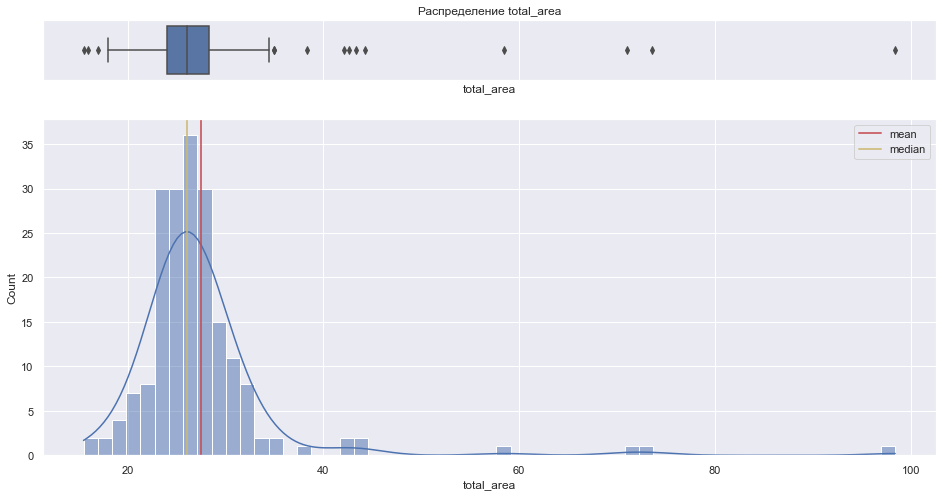

In [26]:
zero_rooms_series = start_data['total_area'][start_data['rooms']==0]
zero_rooms_df = start_data[start_data['rooms']==0]
info_row(zero_rooms_series, zero_rooms_df)

Исходя из всего выше описанного, будем считать, что все кто указал, что у него ноль комнат, живут в студиях (некоторые в большИх, но все же студиях). переселим всех из ноль-комнатных квартир в однушки.

In [27]:
start_data['rooms'].replace(0, 1, inplace=True)

Теперь проверим как нужные нам столбцы коррелируют между собой, до того как мы начали заполнять пропуски.

,total_area,kitchen_area,living_area,rooms,last_price
total_area,1.000000,0.553952,0.924892,0.793872,0.780406
kitchen_area,0.553952,1.000000,0.310906,0.184168,0.589405
living_area,0.924892,0.310906,1.000000,0.880159,0.668305
rooms,0.793872,0.184168,0.880159,1.000000,0.491669
last_price,0.780406,0.589405,0.668305,0.491669,1.000000


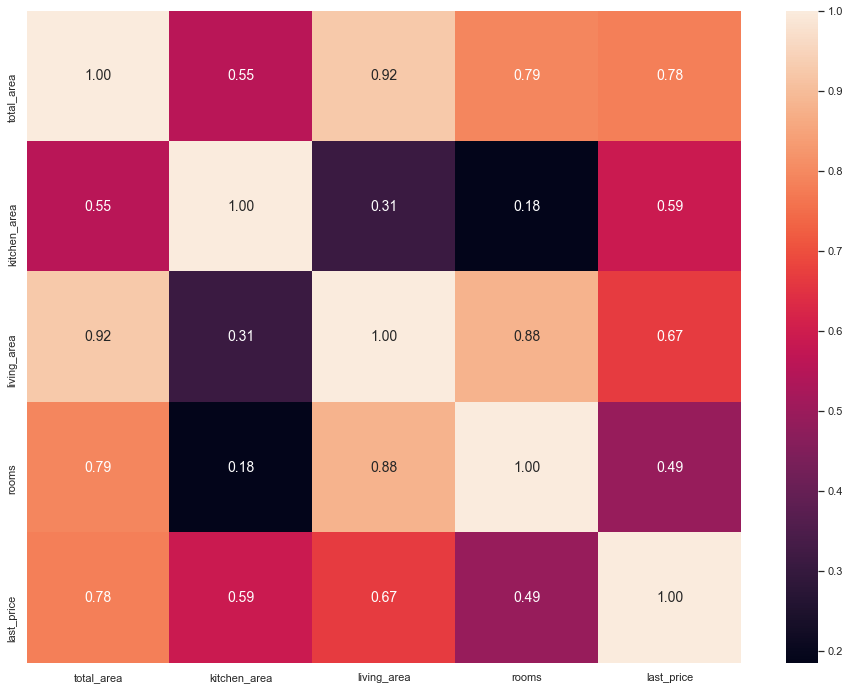

In [28]:
correlation(start_data[['total_area', 'kitchen_area', 'living_area', 'rooms', 'last_price']])

Заполнять пропуски в столбцах с жилой площадью и площадью кухни будем основываясь на среднем соотношении этих значений для типов квартир по комнатам. У нас есть примерно 90% датасета, где у нас уже есть все данные по площадям. Оценим насколько правильно они заполнены.

Для этого нам надо сложить жилую площадь с площадью кухни и поделить на общую. Если это значение больше 1, то это значит, что сумма площадей жилой и кухни больше общей площади, чего не может быть. И очень маленьких значений тоже не должно быть, это будет значить, что прочая нежилая площадь, о которой у нас нет данных, сильно больше жилой площади.

In [29]:
start_data['liv_plus_kit_to_tot_ratio'] = (start_data['living_area'] + start_data['kitchen_area']) / start_data['total_area']

liv_plus_kit_to_tot_ratio
count    20671.000000
mean         0.750092
std          0.070585
min          0.195876
25%          0.711345
50%          0.750000
75%          0.786705
max          1.575758
Name: liv_plus_kit_to_tot_ratio, dtype: float64


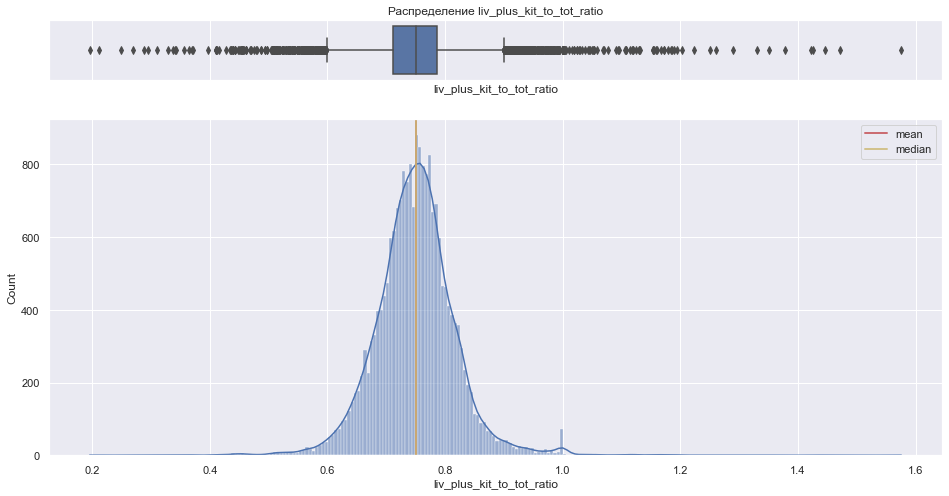

In [30]:
info_row(start_data['liv_plus_kit_to_tot_ratio'], start_data)

Из графика видно, что данные для многих квартир заполнены не верно. Оставим только те, что находятся в диапозоне от 0.603 (нижняя граница размаха) до 1 (максимальное значение, которое можно считать достоверным). 

Для того, чтобы пока не отбрасывать строки, где нет данных заполним их еденицами. Позже, когда мы расчитаем пропуски в столбцах с жилой площадью и площадью кухни, мы пересчитаем этот столбец еще раз и повторим анализ.

In [31]:
start_data['liv_plus_kit_to_tot_ratio'].fillna(1, inplace=True)
start_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23333 entries, 0 to 23332
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      23333 non-null  int64  
 1   total_images               23333 non-null  int64  
 2   last_price                 23333 non-null  float64
 3   total_area                 23333 non-null  float64
 4   first_day_exposition       23333 non-null  object 
 5   rooms                      23333 non-null  int64  
 6   ceiling_height             14271 non-null  float64
 7   floors_total               23333 non-null  int32  
 8   living_area                21474 non-null  float64
 9   floor                      23333 non-null  int64  
 10  is_apartment               23333 non-null  bool   
 11  studio                     23333 non-null  bool   
 12  kitchen_area               21097 non-null  float64
 13  balcony                    23333 non-null  int

liv_plus_kit_to_tot_ratio
count    23333.000000
mean         0.778603
std          0.103568
min          0.195876
25%          0.717277
50%          0.758621
75%          0.809013
max          1.575758
Name: liv_plus_kit_to_tot_ratio, dtype: float64


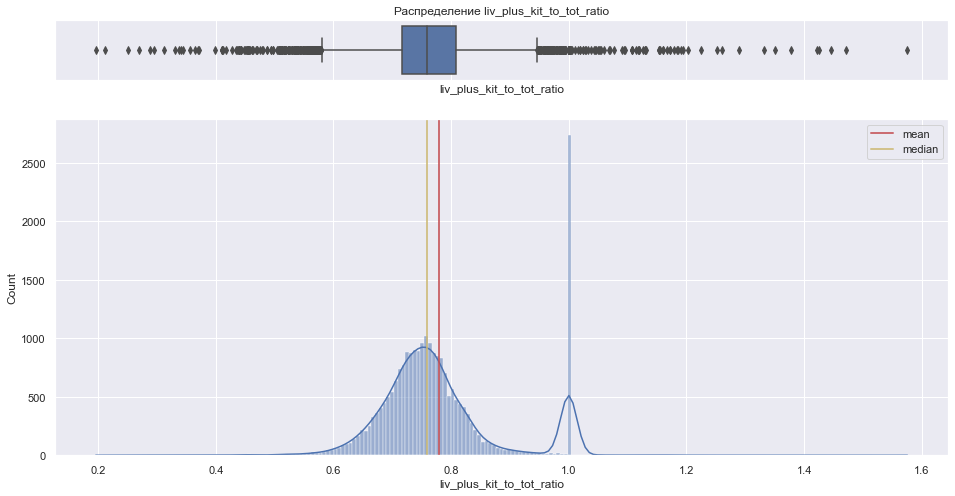

In [32]:
info_row(start_data['liv_plus_kit_to_tot_ratio'], start_data)

In [33]:
start_data = start_data.query('0.603 <= liv_plus_kit_to_tot_ratio <= 1')

liv_plus_kit_to_tot_ratio
count    22919.000000
mean         0.781159
std          0.097873
min          0.603059
25%          0.719146
50%          0.759732
75%          0.809524
max          1.000000
Name: liv_plus_kit_to_tot_ratio, dtype: float64


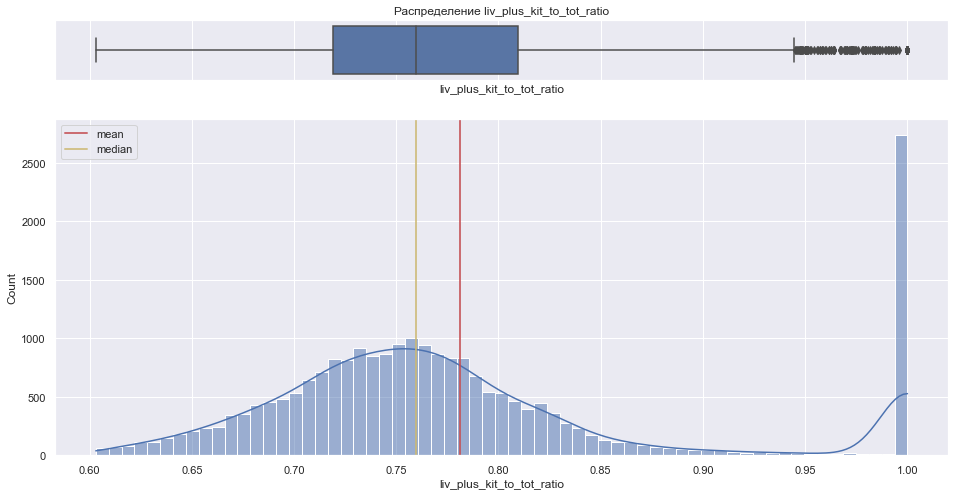

In [34]:
info_row(start_data['liv_plus_kit_to_tot_ratio'], start_data)

Теперь мы можем посчитать соотношения жилой к общей и кухни к общей там, где есть данные.

In [35]:
def living_to_total_ratio_calc(row):
    if row['living_area'] == row['living_area']:
        return row['living_area'] / row['total_area']
    return row['living_area']

start_data['living_to_total_ratio'] = start_data.apply(living_to_total_ratio_calc, axis=1)

In [36]:
def kitchen_to_total_ratio_calc(row):
    if row['kitchen_area'] == row['kitchen_area']:
        return row['kitchen_area'] / row['total_area']
    return row['kitchen_area']

start_data['kitchen_to_total_ratio'] = start_data.apply(kitchen_to_total_ratio_calc, axis=1)

Соберем данные о средних значениях для каждого типа помещения по количеству комнат.

In [37]:
liv_kit_to_tot_ratio_mean_by_rooms = start_data.pivot_table(index='rooms', 
                                                                values=('living_to_total_ratio', 
                                                                        'kitchen_to_total_ratio'))
print(liv_kit_to_tot_ratio_mean_by_rooms)

       kitchen_to_total_ratio  living_to_total_ratio
rooms                                               
1                    0.250272               0.492122
2                    0.173827               0.581215
3                    0.140264               0.630161
4                    0.123316               0.656141
5                    0.112562               0.667566
6                    0.103420               0.709224
7                    0.107170               0.699280
8                    0.037075               0.659491
11                   0.066855               0.710093


Чем больше квартира, тем меньше соотношение площади кухни к общей, и наоборот для жилой.

Как видим у нас получились довольно реалистичные значения. Жилая площадь это не просто общая минус кухня. В нежилую еще могут входить подсобные помещения, санузлы.

kitchen_to_total_ratio
count    20683.000000
mean         0.188068
std          0.071755
min          0.026151
25%          0.134343
50%          0.173077
75%          0.233333
max          0.724638
Name: kitchen_to_total_ratio, dtype: float64


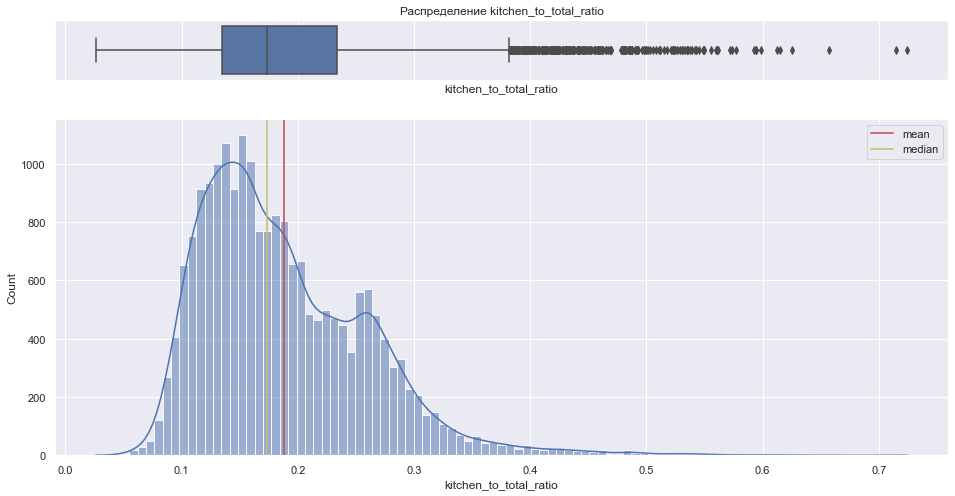

living_to_total_ratio
count    21060.000000
mean         0.566923
std          0.101345
min          0.086957
25%          0.500000
50%          0.569733
75%          0.638003
max          1.000000
Name: living_to_total_ratio, dtype: float64


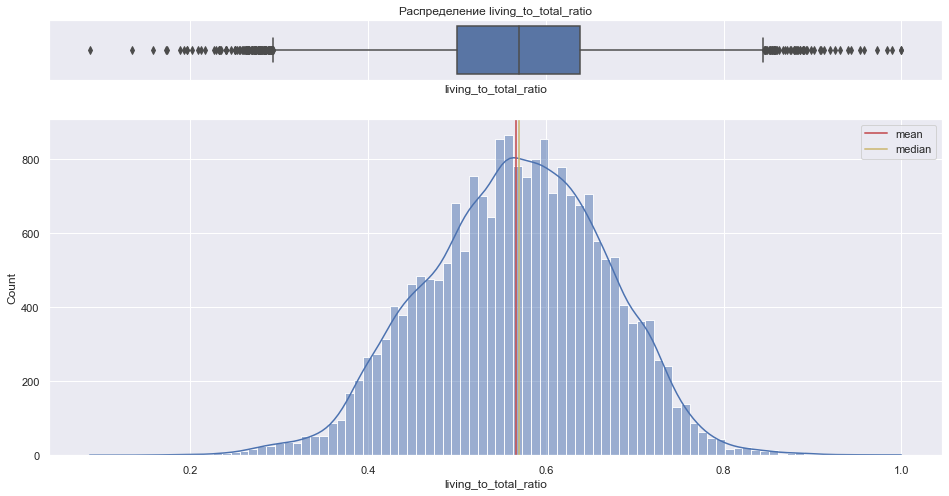

In [38]:
info_row(start_data['kitchen_to_total_ratio'], start_data)
info_row(start_data['living_to_total_ratio'], start_data)

Судя по распределению люди часто не понимают как правильно считать жилую площадь - у некоторых вся площадь жилая, у других наоборот жилой площади нет совсем. Пока оставим данные как есть.

В нашем датасете для столбцов с данными о жилой площади и площади кухонь пропущенно примерно по 10% значений. Будем заполнять их на основании полученных соотношений характерных для количества комнат в квартире. Для этого используем сводную таблицу как словарь, а вставлять пропуски будем умножив значение общей площади на коэффициент соотношения.

In [39]:
def filling_missing_data_kitchen_area(row):
    if row['kitchen_area'] != row['kitchen_area']:
        return row['total_area'] * liv_kit_to_tot_ratio_mean_by_rooms['kitchen_to_total_ratio'][row['rooms']]
    return row['kitchen_area']

def filling_missing_data_living_area(row):
    if row['living_area'] != row['living_area']:
        return row['total_area'] * liv_kit_to_tot_ratio_mean_by_rooms['living_to_total_ratio'][row['rooms']]
    return row['living_area']

start_data['kitchen_area'] = start_data.apply(filling_missing_data_kitchen_area, axis=1)
start_data['living_area'] = start_data.apply(filling_missing_data_living_area, axis=1)

print(start_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22919 entries, 0 to 23332
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      22919 non-null  int64  
 1   total_images               22919 non-null  int64  
 2   last_price                 22919 non-null  float64
 3   total_area                 22919 non-null  float64
 4   first_day_exposition       22919 non-null  object 
 5   rooms                      22919 non-null  int64  
 6   ceiling_height             14000 non-null  float64
 7   floors_total               22919 non-null  int32  
 8   living_area                22919 non-null  float64
 9   floor                      22919 non-null  int64  
 10  is_apartment               22919 non-null  bool   
 11  studio                     22919 non-null  bool   
 12  kitchen_area               22919 non-null  float64
 13  balcony                    22919 non-null  int

Пересчитаем столбец соотношения суммы площадей жилой и кухни к общей.

In [40]:
start_data.drop(['liv_plus_kit_to_tot_ratio'], axis='columns', inplace=True)

In [41]:
start_data['liv_plus_kit_to_tot_ratio'] = (start_data['living_area'] + start_data['kitchen_area']) / start_data['total_area']
start_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22919 entries, 0 to 23332
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      22919 non-null  int64  
 1   total_images               22919 non-null  int64  
 2   last_price                 22919 non-null  float64
 3   total_area                 22919 non-null  float64
 4   first_day_exposition       22919 non-null  object 
 5   rooms                      22919 non-null  int64  
 6   ceiling_height             14000 non-null  float64
 7   floors_total               22919 non-null  int32  
 8   living_area                22919 non-null  float64
 9   floor                      22919 non-null  int64  
 10  is_apartment               22919 non-null  bool   
 11  studio                     22919 non-null  bool   
 12  kitchen_area               22919 non-null  float64
 13  balcony                    22919 non-null  int

liv_plus_kit_to_tot_ratio
count    22919.000000
mean         0.755975
std          0.065719
min          0.337229
25%          0.717628
50%          0.753564
75%          0.786660
max          1.345393
Name: liv_plus_kit_to_tot_ratio, dtype: float64


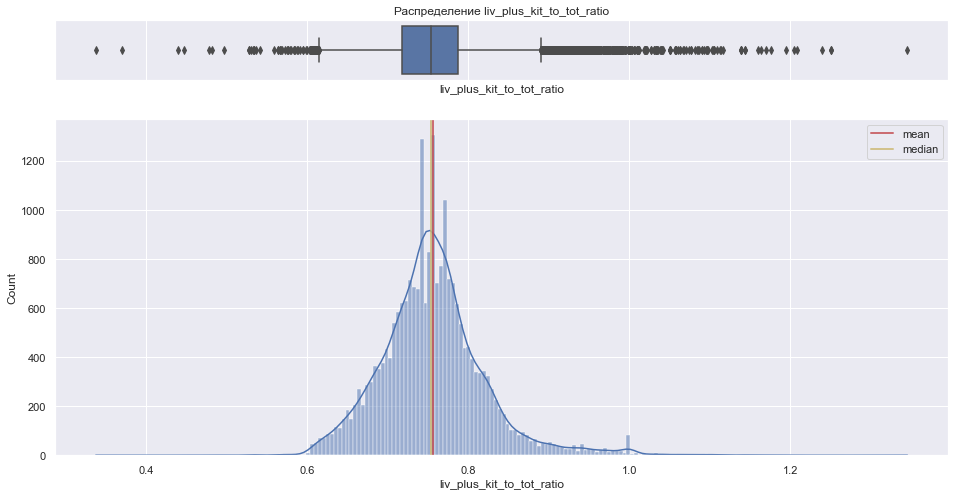

In [42]:
info_row(start_data['liv_plus_kit_to_tot_ratio'], start_data)

У нас снова появились значения которые выходят за диапазоны нижней границы и еденицы. Еще появились явные пики - скорее всего это результат заполнения пропусков. Снова отрежем те данные, которые вбиваются за границы 0.6 - 1.

In [43]:
start_data = start_data.query('0.6 <= liv_plus_kit_to_tot_ratio <= 1')

liv_plus_kit_to_tot_ratio
count    22783.000000
mean         0.754981
std          0.061800
min          0.603059
25%          0.717647
50%          0.753333
75%          0.785868
max          1.000000
Name: liv_plus_kit_to_tot_ratio, dtype: float64


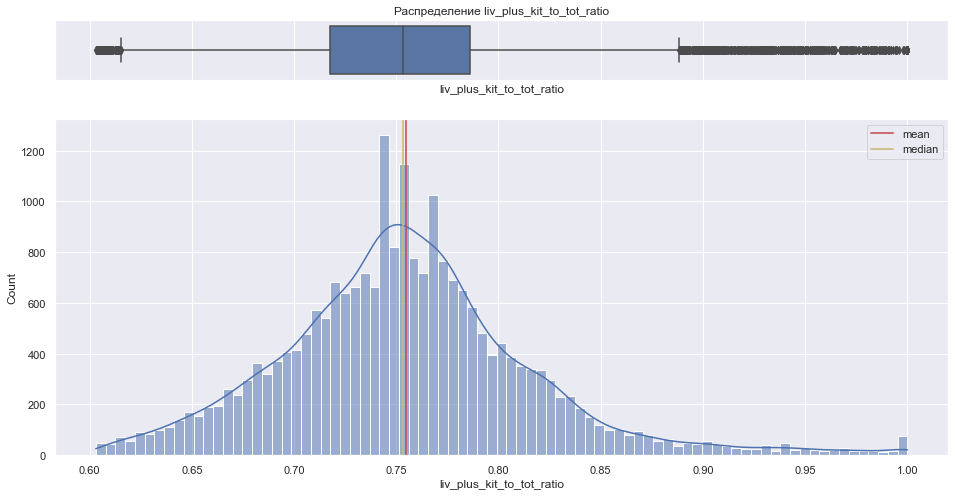

In [44]:
info_row(start_data['liv_plus_kit_to_tot_ratio'], start_data)

Посмотрим корреляцию полученных значения между собой.

,total_area,kitchen_area,living_area,rooms,last_price
total_area,1.000000,0.570338,0.942628,0.799062,0.780338
kitchen_area,0.570338,1.000000,0.342595,0.194754,0.596982
living_area,0.942628,0.342595,1.000000,0.877219,0.680401
rooms,0.799062,0.194754,0.877219,1.000000,0.490683
last_price,0.780338,0.596982,0.680401,0.490683,1.000000


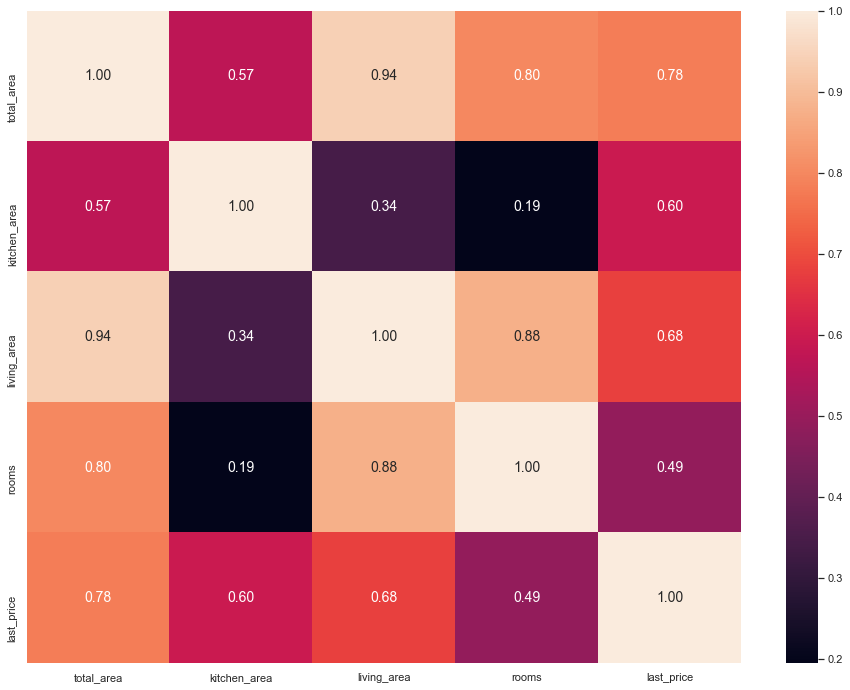

In [45]:
correlation(start_data[['total_area', 'kitchen_area', 'living_area', 'rooms', 'last_price']])

Исходя из анализа корреляций до и после откидывания части данных, которые явно содержали ошибки можно с уверенностью сказать, что это было оправдано. Ошибки, которые мы отбросили, говорят о том, что в момент заполнения формы люди сами не до конца понимали, что является жилой площадью, а что нет.

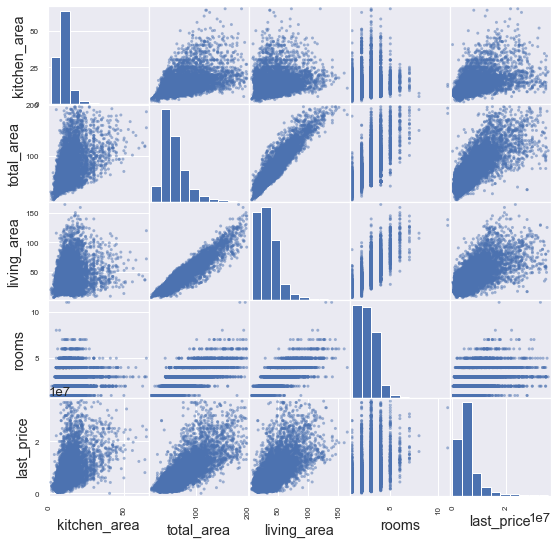

In [46]:
data_for_matrix = start_data[['kitchen_area', 'total_area', 'living_area', 'rooms', 'last_price']]

pd.plotting.scatter_matrix(data_for_matrix, figsize=(9, 9));

Давайте теперь посмотрим еще на одну характеристику, которая нам понадобится для формирования выводов - высота потолков.

ceiling_height
count    13947.000000
mean         2.754689
std          1.229549
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


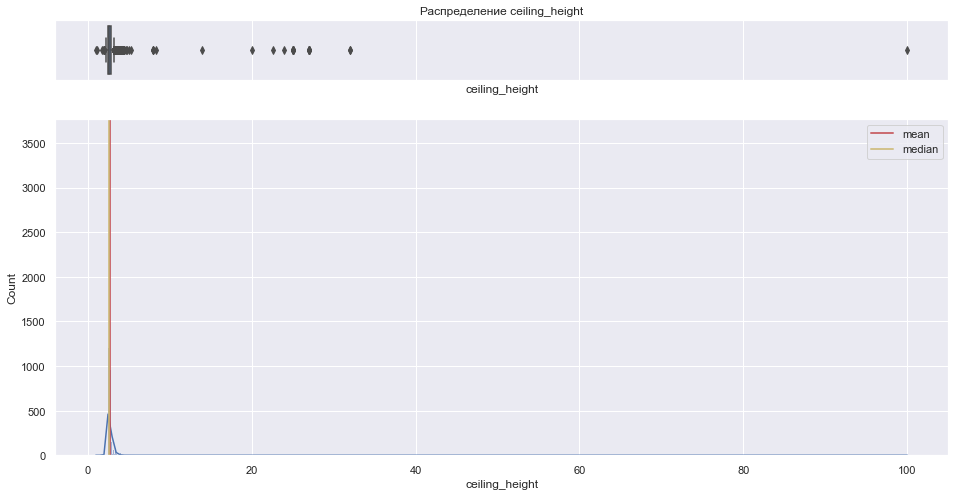

In [47]:
info_row(start_data['ceiling_height'], start_data)

Довольно много аномальных значений. Оставим только то, что попадает в диапозон 2.2 - 5 метров. Но прежде нам надо заполнить пропуски, чтобы не потерять их при обрезании "хвостов". 

Построим таблицу медианных и средних значений высоты потолков в зависимости от количества комнат.

In [48]:
ceiling_height_rooms_median = start_data.pivot_table(index='rooms', values=('ceiling_height'), 
                                                     aggfunc=('mean', 'median', 'count'))
print(ceiling_height_rooms_median)

       count      mean  median
rooms                         
1       4542  2.713292   2.640
2       4759  2.744371   2.600
3       3676  2.766450   2.650
4        743  2.906151   2.800
5        168  3.094643   3.090
6         44  3.151364   3.145
7         11  3.224545   3.300
8          2  2.910000   2.910
11         2  3.415000   3.415


Заменим пропущенные значения на медианные значения по количеству комнат в квартире.

In [49]:
def ceiling_fill_na(row):
    if row['ceiling_height'] != row['ceiling_height']:
        return ceiling_height_rooms_median['median'][row['rooms']]
    return row['ceiling_height']

start_data['ceiling_height'] = start_data.apply(ceiling_fill_na, axis=1)

In [50]:
start_data = start_data.query('2.2 <= ceiling_height <= 5')

ceiling_height
count    22744.000000
mean         2.685201
std          0.207403
min          2.200000
25%          2.600000
50%          2.640000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64


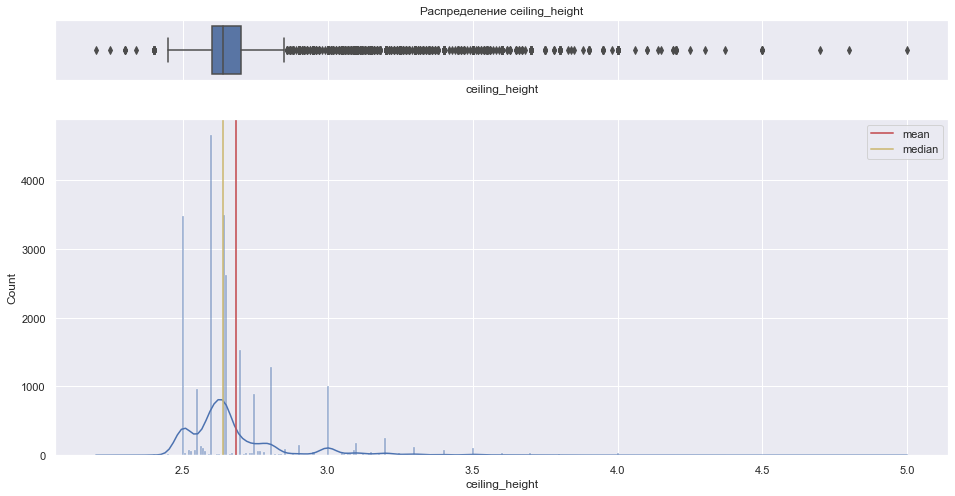

In [51]:
info_row(start_data['ceiling_height'], start_data)

Ожидаемо на графике появилось большое количество пиков, так как для почти половины датасета отсутсвовала информация о высоте потолков и мы заполнили эти ячейки одинаковыми значениями, разбитыми только по количеству комнат.

Осталось изменить тип данных для стобца `days_exposition`. Сейчас данные в нем записаны в формате `float64` и имеют пропуски. Чтобы привести тип данных к `int64`, нам необходимо избавиться от пропусков. Мы не можем заполнить эти пропуски значимыми данными, так как это исказит наш анализ. Заполним их значением `-1000` (количество дней размещения объявления не может быть отрицательным), поменяем тип данных. К сожалению в столбце с типом данных `int64` не могут содержаться NaN значения, поэтому оставим отрицательные как альтернативу.

In [52]:
start_data['days_exposition'] = start_data['days_exposition'].fillna(-1000)
start_data['days_exposition'] = start_data['days_exposition'].astype('int')

days_exposition
count    22744.000000
mean        22.914043
std        449.007498
min      -1000.000000
25%         23.000000
50%         73.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64


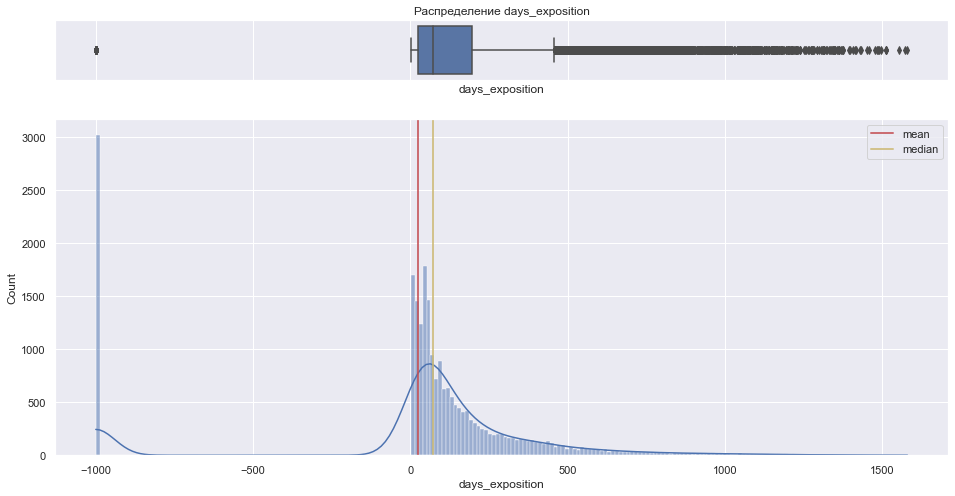

In [53]:
info_row(start_data['days_exposition'],start_data)

##### Вывод после заполнения пропусков

In [54]:
print(100-((len(start_data.last_price)/INITIAL_DF_SIZE)*100))

4.029705894763495


Пока мы очищали данные и заполняли пропуски нам пришлось разобраться с аномалиями и явными ошибками. В результате этой работы нам пришлось убрать из датасета ~4% строк. Довольно много, но эти плохие данные могли сказаться на результате исследования.

### Добавление данных в таблицу

Перед тем, как переходить к добавлению новых данных в таблицу преобразуем формат времени в нашей таблице.

In [55]:
print(start_data['first_day_exposition'].head(1))

0    2019-03-07T00:00:00
Name: first_day_exposition, dtype: object


In [56]:
start_data['first_day_exposition'] = pd.to_datetime(
    start_data['first_day_exposition'], format='%Y-%m-%d')

print(start_data['first_day_exposition'].head(1))

0   2019-03-07
Name: first_day_exposition, dtype: datetime64[ns]


Продолжим работать с датой и добавим в таблицу 3 новых столбца: день недели, месяц и год.

In [57]:
def weekdays_add(row):
    weekdays = {0:'1 - Понедельник',
                1:'2 - Вторник',
                2:'3 - Среда',
                3:'4 - Четверг',
                4:'5 - Пятница',
                5:'6 - Суббота',
                6:'7 - Воскресенье'}
    return weekdays[row['first_day_exposition'].weekday()]

start_data['weekday'] = start_data.apply(weekdays_add, axis=1)
print(start_data['weekday'].head())

0        4 - Четверг
1        2 - Вторник
2        4 - Четверг
3        2 - Вторник
4    1 - Понедельник
Name: weekday, dtype: object


In [58]:
start_data['year'] = start_data['first_day_exposition'].dt.year
start_data['month'] = start_data['first_day_exposition'].dt.month
print(start_data['year'], start_data['month'])

0        2019
1        2018
2        2015
3        2018
4        2018
         ... 
23328    2017
23329    2018
23330    2018
23331    2017
23332    2017
Name: year, Length: 22744, dtype: int64 0         3
1        12
2         8
3         6
4         9
         ..
23328     3
23329     1
23330     2
23331     3
23332     7
Name: month, Length: 22744, dtype: int64


Теперь добавим в датасет цену квадратного метра для каждой квартиры.

0    120370.370370
1     82920.792079
2     92785.714286
3    100000.000000
4     95065.789474
Name: sq_meter_price, dtype: float64
sq_meter_price
count     22744.000000
mean      96579.825889
std       36769.396705
min         111.834862
25%       76239.147028
50%       94504.902425
75%      113233.789423
max      848484.848485
Name: sq_meter_price, dtype: float64


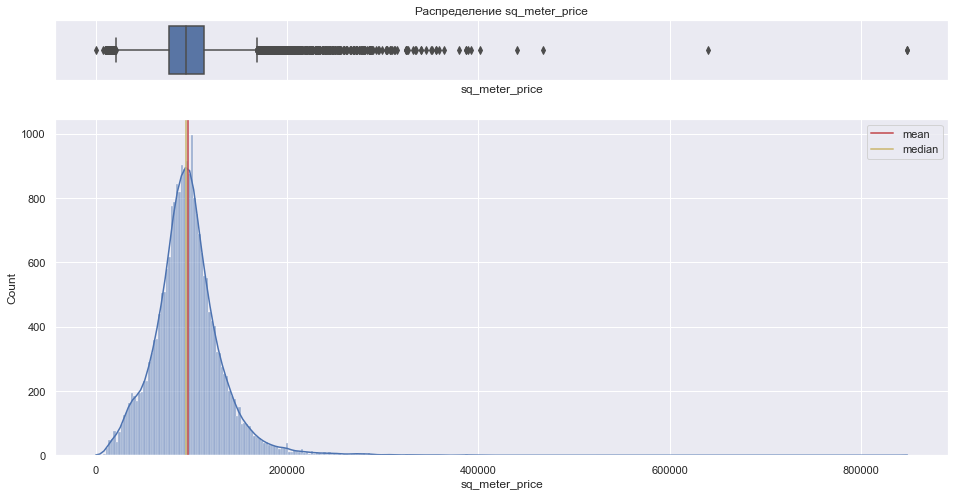

In [59]:
start_data['sq_meter_price'] = start_data['last_price'] / start_data['total_area']
print(start_data['sq_meter_price'].head(5))
info_row(start_data['sq_meter_price'], start_data)

Добавим этаж квартиры: первый, последний, другой.

In [60]:
def floors_identification(row):
    if row['floor'] == 1:
        return "Первый"
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

start_data['floor_ident'] = start_data.apply(floors_identification, axis=1)

print(start_data['floor_ident'].head(15))

0        Другой
1        Первый
2        Другой
3        Другой
4        Другой
5        Другой
6        Другой
7        Другой
8        Другой
9        Другой
10       Другой
11    Последний
12    Последний
13       Первый
14       Другой
Name: floor_ident, dtype: object


Еще раз посчитаем отношения жилой площади к общей и площади кухни к общей.

In [61]:
start_data['living_to_total_ratio'] = start_data['living_area'] / start_data['total_area']
start_data['kitchen_to_total_ratio'] = start_data['kitchen_area'] / start_data['total_area']

living_to_total_ratio
count    22744.000000
mean         0.566142
std          0.096900
min          0.134615
25%          0.496032
50%          0.572519
75%          0.632490
max          0.908439
Name: living_to_total_ratio, dtype: float64


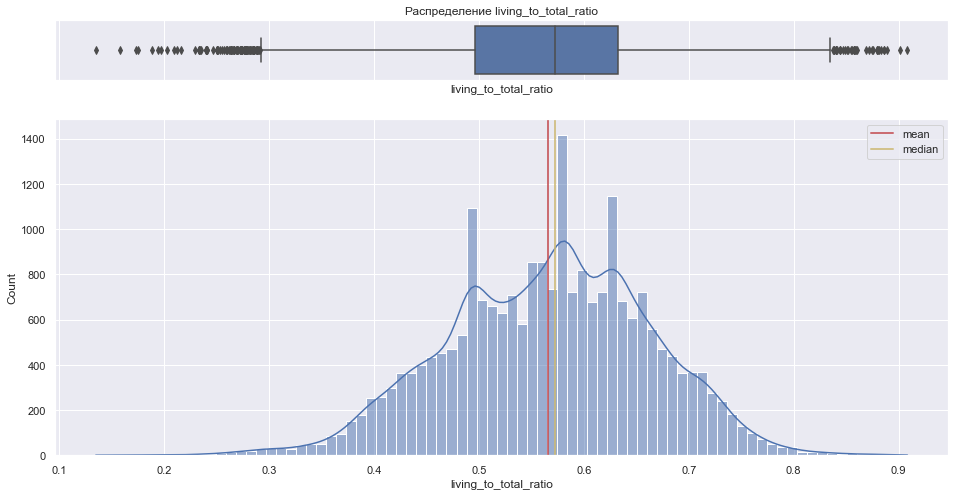

kitchen_to_total_ratio
count    22744.000000
mean         0.188819
std          0.069770
min          0.026151
25%          0.136853
50%          0.173827
75%          0.238095
max          0.724638
Name: kitchen_to_total_ratio, dtype: float64


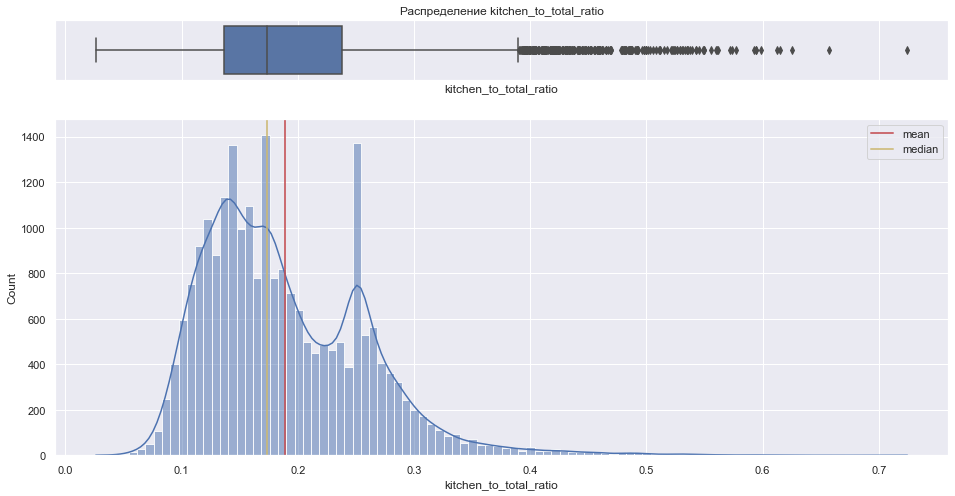

In [62]:
info_row(start_data['living_to_total_ratio'], start_data)
info_row(start_data['kitchen_to_total_ratio'], start_data)

### Исследовательский анализ данных

Посмотрим на время продажи квартиры. Надо учесть, что у нас там содержатся данные, которые мы добавили для преобразования типа. Сделаем срез и уберем лишнее.

days_exposition
count    19724.000000
mean       179.535439
std        218.467850
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


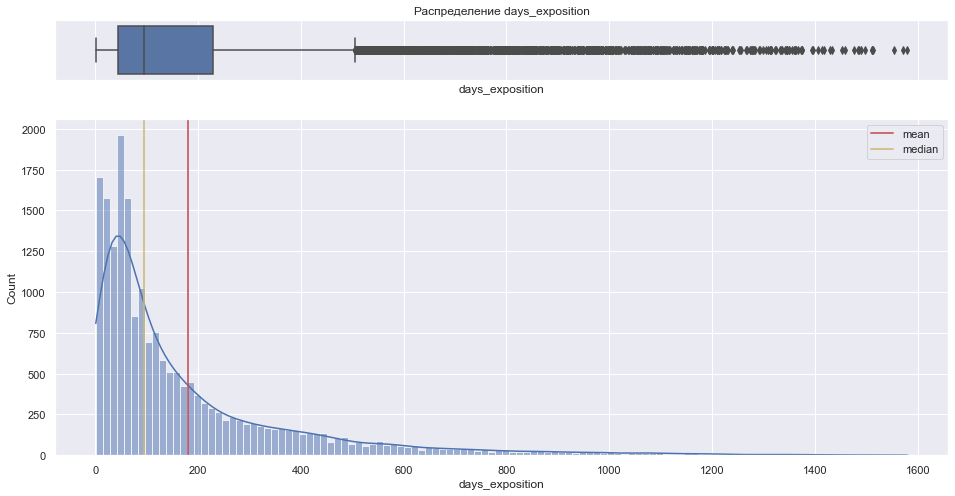

In [63]:
days_exposition_df = start_data.query('days_exposition > 0')
info_row(days_exposition_df['days_exposition'], days_exposition_df)

In [64]:
first_month_sale = days_exposition_df[days_exposition_df['days_exposition']<=31]['days_exposition'].count()
first_month_sale_ratio = first_month_sale / days_exposition_df['days_exposition'].count() * 100
print(first_month_sale_ratio)

18.591563577367673


Среднее время продажи квартиры - 172 дня

Медиана - 91, то есть половина квартир продается быстрее чем за 3 месяца. 
Быстрой продажей можно считать продажу в первый месяц после размещения объявления. На этот период приходится 19% всех продаж.
Все, что находится за третьей квартилью (>218 дней) долгая продажа. Попробуем чуть ближе посмотреть на быстро проданные квартиры и на те, что продавались очень долго.

In [65]:
def sale_type(row):
    if row['days_exposition'] >= 218:
        return 'long'
    elif row['days_exposition'] < 32:
        return 'quick'
    return 'normal'

days_exposition_df.loc[:, 'sale_time'] = days_exposition_df.apply(sale_type, axis=1)

In [66]:
cnt_quick = days_exposition_df[days_exposition_df['sale_time'] == 'quick']['last_price'].count()
cnt_long = days_exposition_df[days_exposition_df['sale_time'] == 'long']['last_price'].count()
cnt_normal = days_exposition_df[days_exposition_df['sale_time'] == 'normal']['last_price'].count()
cnt_all = len(days_exposition_df['last_price'])

In [67]:
print(f'Быстро продано {cnt_quick/cnt_all :.2%} квартир от общего числа объявлений')
print(f'Долго продавали {cnt_long/cnt_all :.2%} квартир от общего числа объявлений')

Быстро продано 18.59% квартир от общего числа объявлений
Долго продавали 26.18% квартир от общего числа объявлений


last_price
count    5.164000e+03
mean     6.106320e+06
std      4.436014e+06
min      4.500000e+05
25%      3.490000e+06
50%      4.800000e+06
75%      7.100000e+06
max      3.500000e+07
Name: last_price, dtype: float64


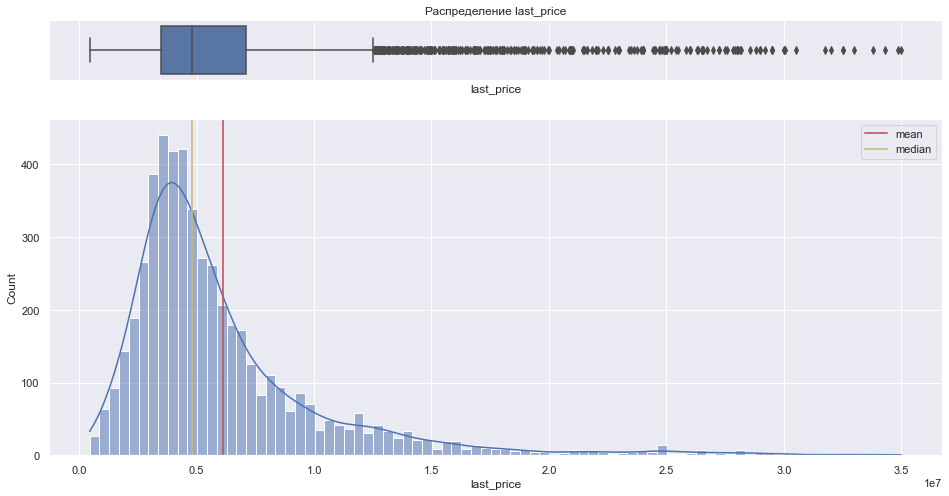

sq_meter_price
count      5164.000000
mean      95900.870728
std       36420.323759
min       10561.797753
25%       74864.421886
50%       92500.000000
75%      112310.479376
max      364076.784969
Name: sq_meter_price, dtype: float64


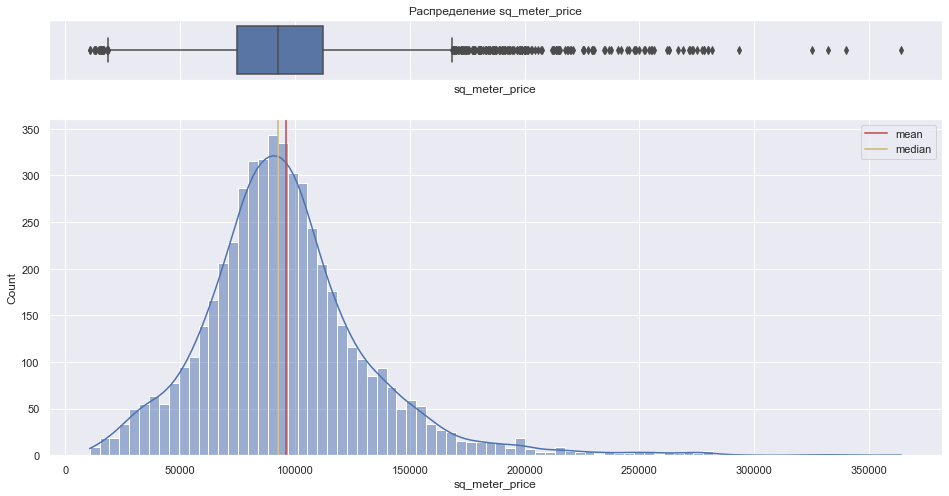

rooms
count    5164.000000
mean        2.154919
std         1.027236
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.000000
Name: rooms, dtype: float64


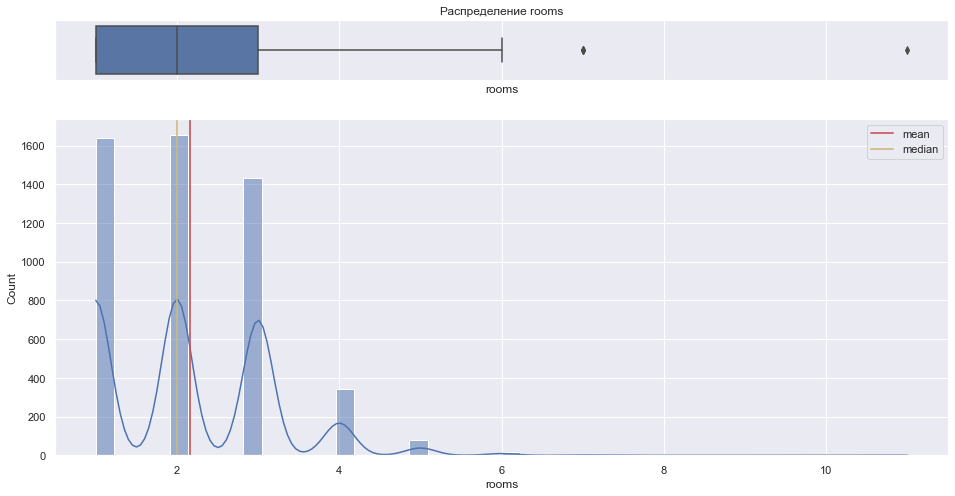

In [68]:
long_sale = days_exposition_df.query('days_exposition >= 218')
quick_sale = days_exposition_df.query('days_exposition < 32')
info_row(long_sale['last_price'], long_sale)
info_row(long_sale['sq_meter_price'], long_sale)
info_row(long_sale['rooms'], long_sale)

last_price
count    3.667000e+03
mean     5.118926e+06
std      3.059061e+06
min      1.219000e+04
25%      3.425000e+06
50%      4.400000e+06
75%      5.950000e+06
max      3.510700e+07
Name: last_price, dtype: float64


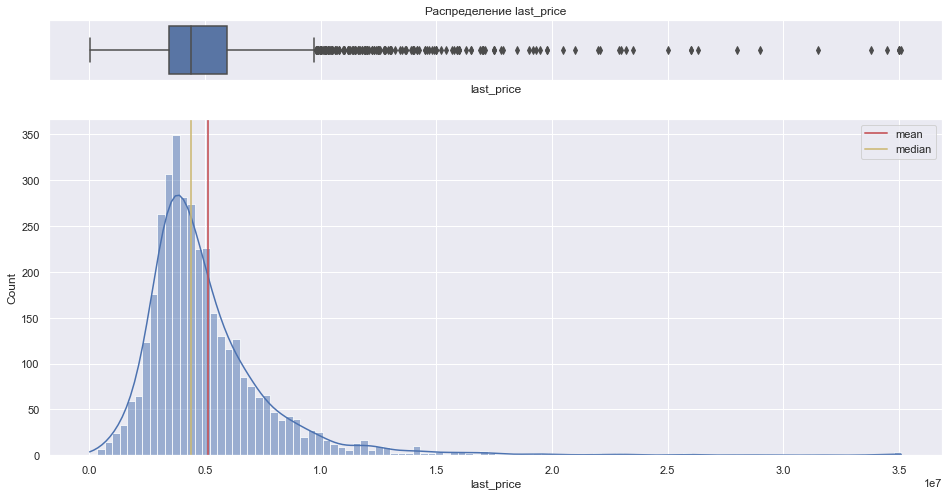

sq_meter_price
count      3667.000000
mean      98171.316929
std       31127.743696
min         111.834862
25%       81145.747881
50%       96366.508689
75%      112470.095694
max      388888.888889
Name: sq_meter_price, dtype: float64


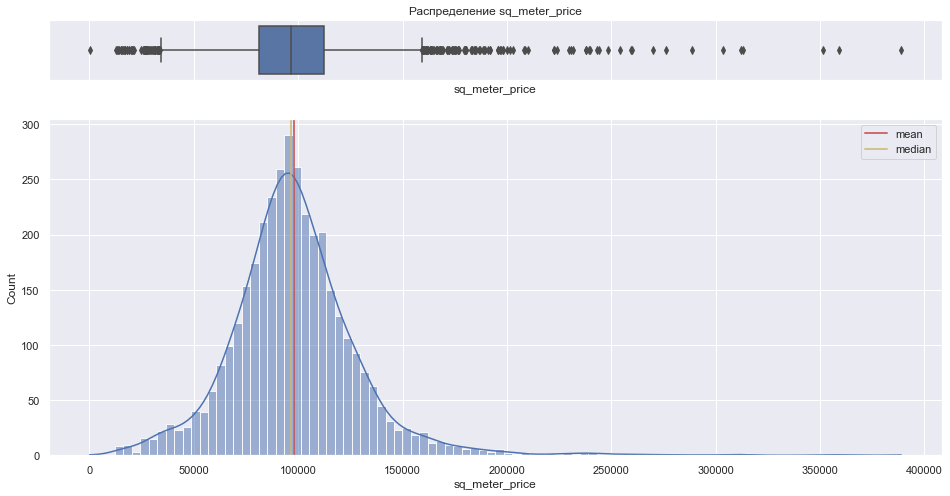

rooms
count    3667.000000
mean        1.857104
std         0.882194
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         7.000000
Name: rooms, dtype: float64


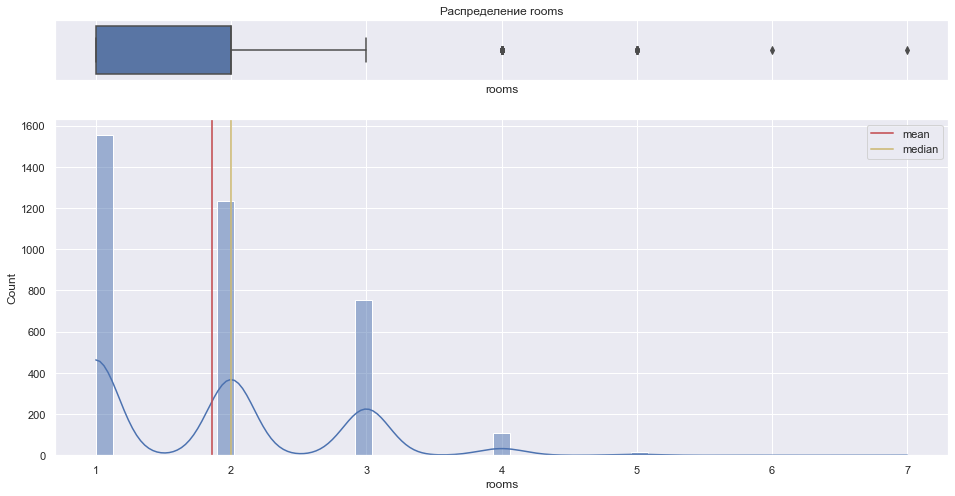

In [69]:
info_row(quick_sale['last_price'], quick_sale)
info_row(quick_sale['sq_meter_price'], quick_sale)
info_row(quick_sale['rooms'], quick_sale)

Из приведенных выше графиков и стаистик можно сделать вывод, что срок за который будет продана квартира мало зависит от цены, стоимости квадратного метра и количества комнат.

Давайте для наглядности наложим наши гистограммы друг на друга и посмотрим есть ли значительная разница в основных параметрах между быстро проданными квартирами и теми, что продовались долго.

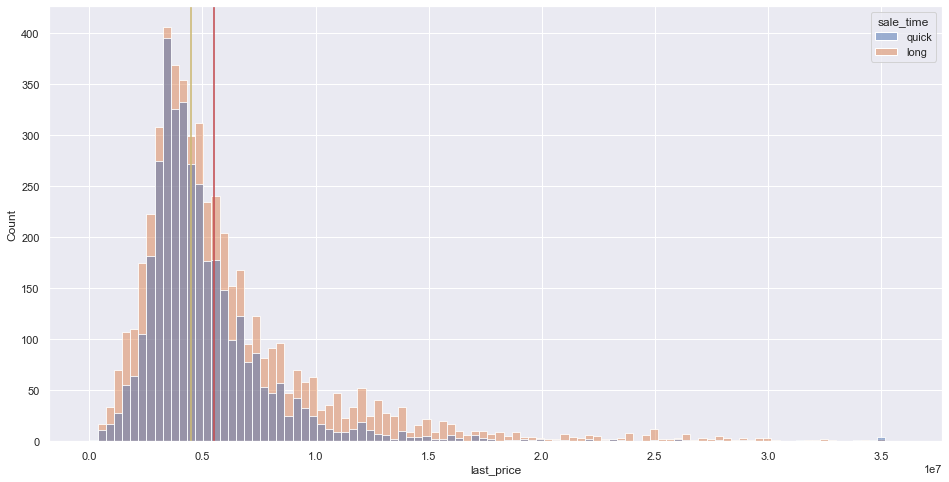

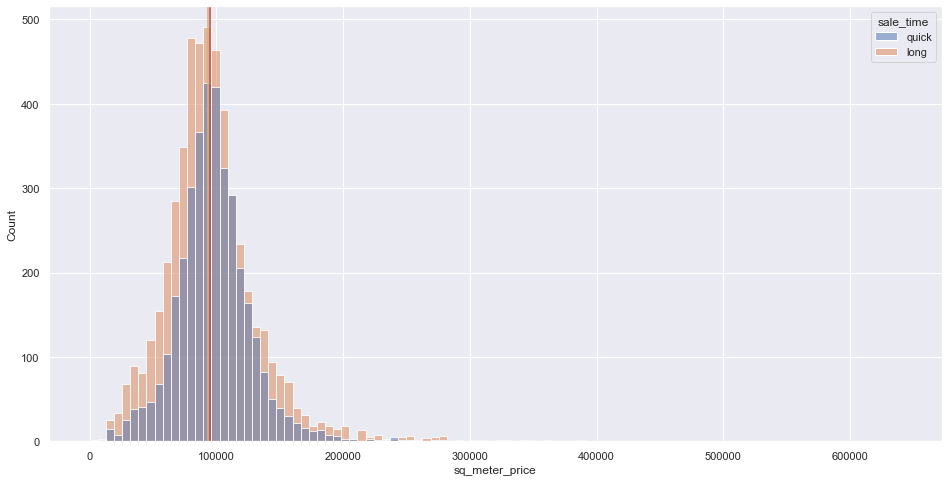

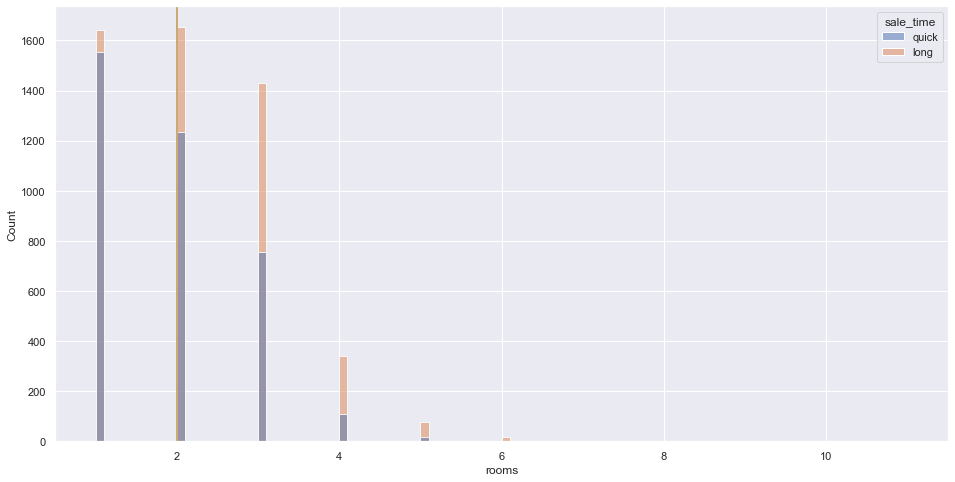

In [70]:
columns = ['last_price', 'sq_meter_price', 'rooms']
for coulmn in columns:
    several_hists(df=days_exposition_df, x=coulmn, hue='sale_time', bins=100, hue_order=['quick', 'long'])

,last_price,days_exposition,total_area,living_area,cityCenters_nearest,sq_meter_price
last_price,1.000000,0.128772,0.775325,0.674765,-0.347791,0.689864
days_exposition,0.128772,1.000000,0.156490,0.140147,-0.055101,0.030704
total_area,0.775325,0.156490,1.000000,0.941918,-0.228399,0.152042
living_area,0.674765,0.140147,0.941918,1.000000,-0.213964,0.057972
cityCenters_nearest,-0.347791,-0.055101,-0.228399,-0.213964,1.000000,-0.389139
sq_meter_price,0.689864,0.030704,0.152042,0.057972,-0.389139,1.000000


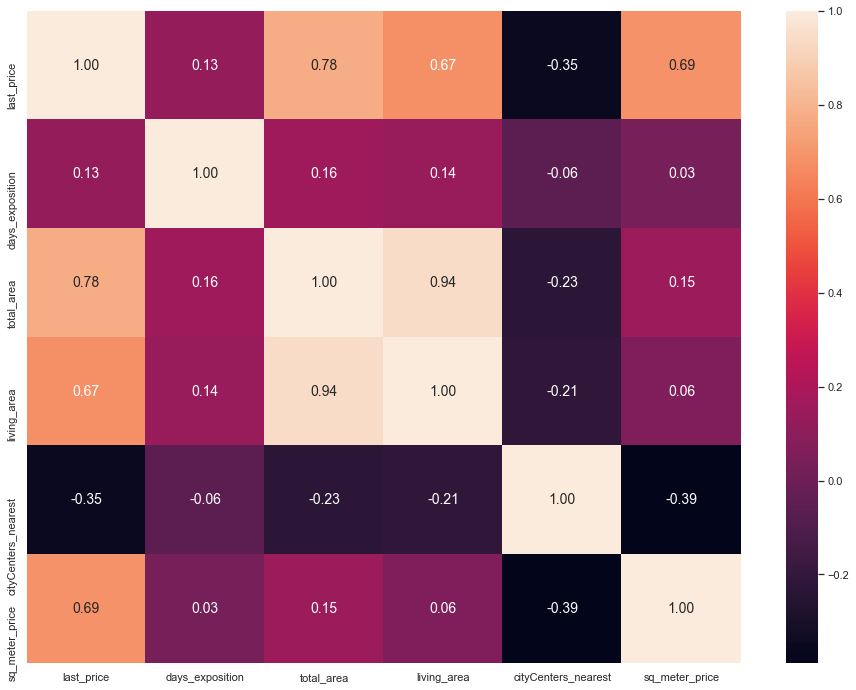

In [71]:
correlation(days_exposition_df[[
    'last_price',
    'days_exposition',
    'total_area',
    'living_area',
    'cityCenters_nearest',
    'sq_meter_price'
]])

Как видно из матриц корреляций, долгая или быстрая продажа не зависит ни от одного из значимых параметров. Значит причина кроется в самих квартирах. Возможно долгопродаваемые квартиры в плохом состоянии или вредные владельцы продовали их неспеша.

Выведем матрицу распределений значений по следующим параметрам:
- количество комнат
- общая площадь
- растояние до центра
- цена

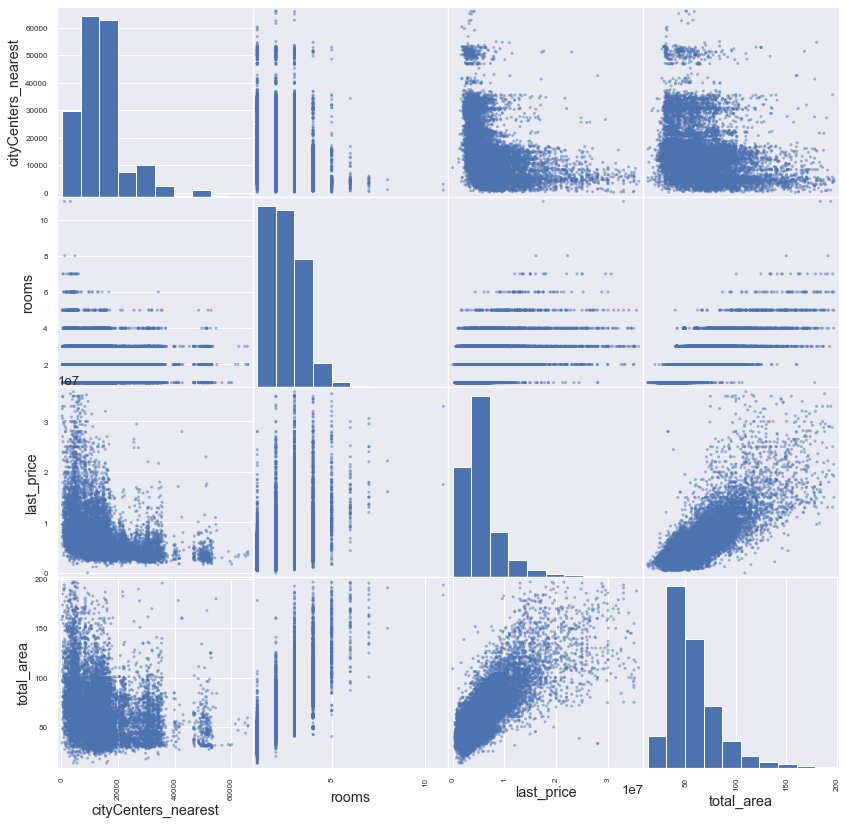

In [72]:
data_for_matrix = start_data[['cityCenters_nearest', 'rooms', 'last_price', 'total_area']]

pd.plotting.scatter_matrix(data_for_matrix, figsize=(14, 14));

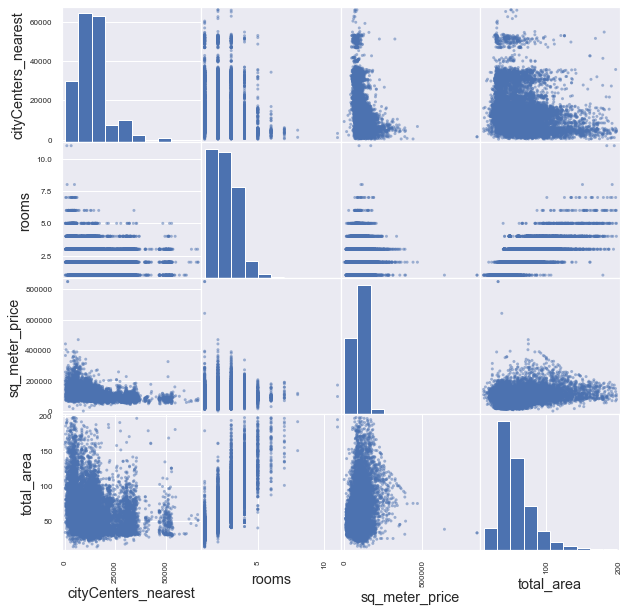

In [73]:
data_for_matrix = start_data[['cityCenters_nearest', 'rooms', 'sq_meter_price', 'total_area']]

pd.plotting.scatter_matrix(data_for_matrix, figsize=(10, 10));

Из данных матриц, видно, что чем ближе к центру тем выше цена. И естественно очень высокая зависимость цены от общей площади.

,cityCenters_nearest,rooms,last_price,total_area
cityCenters_nearest,1.000000,-0.163423,-0.346952,-0.232244
rooms,-0.163423,1.000000,0.491032,0.799095
last_price,-0.346952,0.491032,1.000000,0.780680
total_area,-0.232244,0.799095,0.780680,1.000000


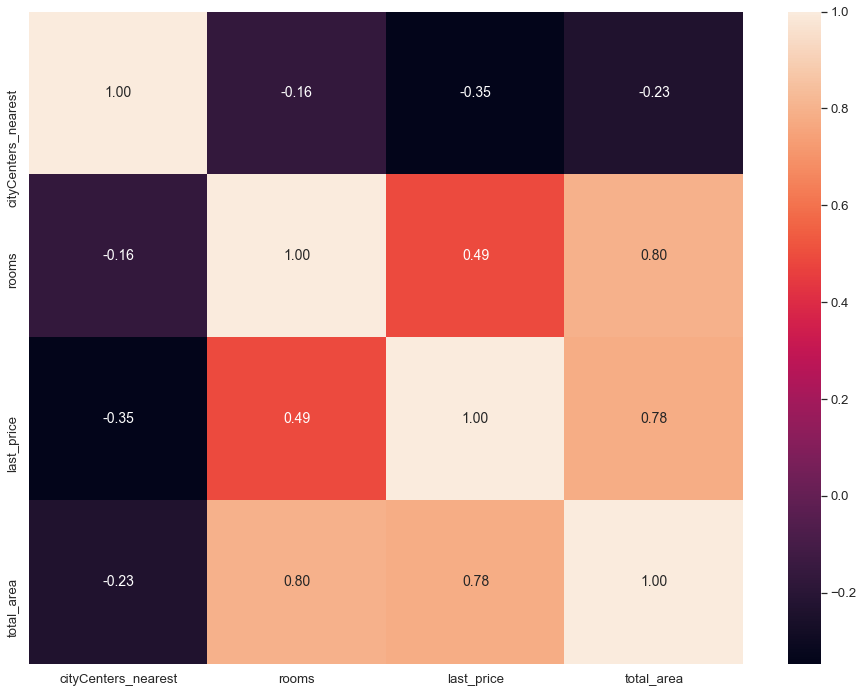

In [74]:
correlation(start_data[['cityCenters_nearest', 'rooms', 'last_price', 'total_area']])

Матрица корреляций подтверждает наши выводы.

Посмотрим как цена квадратного метра зависит от этажа.

In [75]:
start_data.pivot_table(index='floor_ident', values='sq_meter_price', aggfunc='median')

,sq_meter_price
floor_ident,
Другой,97857.142857
Первый,81004.648074
Последний,86901.578813


Первый и последний не очень ценятся, хотя лучше последний чем первый, там соседи сверху не зальют и металические шары по полу не катают.

                 count          mean
weekday                             
1 - Понедельник   3462  97066.496725
2 - Вторник       4022  97000.105625
3 - Среда         3824  97215.414698
4 - Четверг       4093  96393.543987
5 - Пятница       3853  96631.879525
6 - Суббота       1849  94570.589674
7 - Воскресенье   1641  95648.232822


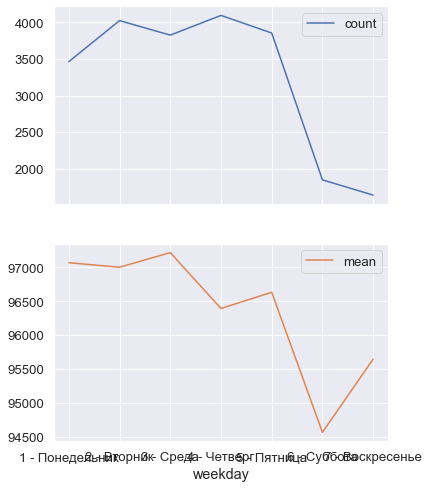

In [76]:
data_by_year_weekday = start_data.pivot_table(
              index=('weekday'), 
              values='sq_meter_price', 
              aggfunc=('mean', 'count'))
print(data_by_year_weekday)
data_by_year_weekday.plot(kind='line',figsize=(6,8), subplots=True);

Самая дорогая оценка квартир начинается во вторник и идет на спад к выходным. Реже всего квартиры на продажу выставляют в выходные, но при этом цена самая низкая в субботу. 

       count          mean
month                     
1       1438  97196.154218
2       2538  96106.499630
3       2491  96827.911321
4       2295  98554.872203
5       1217  95776.951402
6       1698  94772.802411
7       1615  96058.651066
8       1676  97319.875073
9       1899  97397.330247
10      2029  95935.560933
11      2281  96668.527804
12      1567  95535.507176


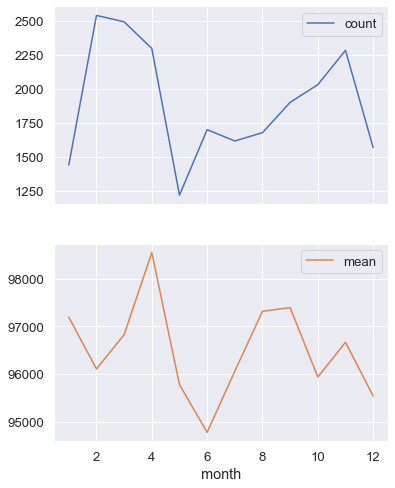

In [77]:
data_by_year_weekday = start_data.pivot_table(
              index=('month'), 
              values='sq_meter_price', 
              aggfunc=('mean', 'count'))
print(data_by_year_weekday)
data_by_year_weekday.plot(kind='line',figsize=(6,8), subplots=True);

Самое лучшее время для покупки квартиры - начало лета. Дальше хорошую сделку можно найти на новогодних праздниках, немного дороже. А вот весной и осенью лучше не торопиться с преобретением жилья.

      count           mean
year                      
2014    123  114081.030642
2015   1119   97566.553189
2016   2659   94489.023151
2017   7864   94462.062903
2018   8215   96264.843002
2019   2764  104374.442743


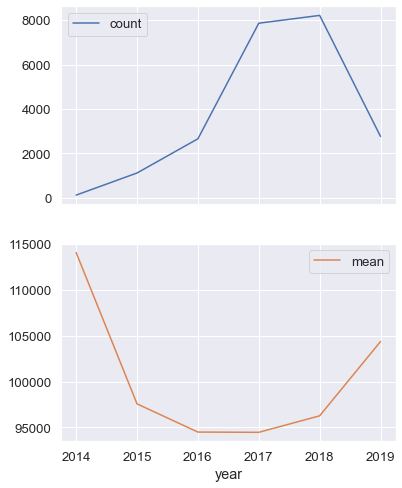

In [78]:
data_by_year_weekday = start_data.pivot_table(
              index=('year'), 
              values='sq_meter_price', 
              aggfunc=('mean', 'count'))
print(data_by_year_weekday)
data_by_year_weekday.plot(kind='line',figsize=(6,8), subplots=True);

Практически наглядная демонстрация закона про спрос и предложение. Больше предложений - ниже цена. Коррективы могут вносить внешние факторы, типа кризисов и обвалов курсов рубля.

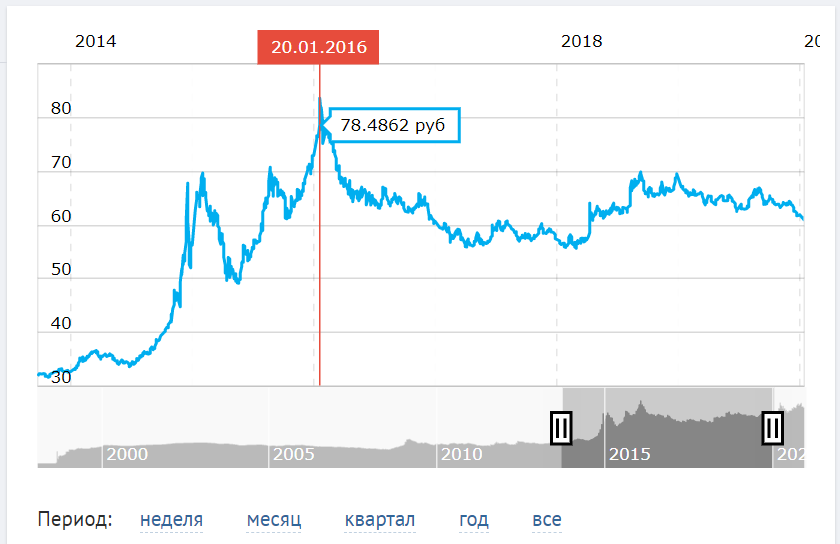

Пострим сколько объявлений у нас есть для каждого населенного пункта. Выделим топ-10 с наибольшим количесвтом объявлений.

In [79]:
data_by_locality = start_data.pivot_table(index='locality_name',
                                         values='sq_meter_price',
                                          aggfunc=['count','min', 'mean', 'max']
                                         )

data_by_locality.columns=['count', 'min', 'mean', 'max']

big_cities_stat = data_by_locality.query('count > 230')

data_by_locality_count = big_cities_stat.sort_values(by='count', ascending=False).iloc[:10,:]
data_by_locality_price = big_cities_stat.sort_values(by='mean', ascending=False).iloc[:10,:]
display(data_by_locality_count)
display(data_by_locality_price['mean'])


,count,min,mean,max
locality_name,,,,
Санкт-Петербург,14963,111.834862,110965.378461,848484.848485
посёлок Мурино,501,50000.000000,85378.340281,138580.246914
посёлок Шушары,433,47700.416089,78498.062630,134000.000000
Всеволожск,384,31400.000000,68711.245377,640422.350472
Пушкин,359,59836.065574,103192.666147,256521.739130
Колпино,333,50819.672131,75455.141895,125000.000000
посёлок Парголово,319,48405.466970,90632.210984,138522.427441
Гатчина,298,18103.448276,68979.958801,146315.789474
деревня Кудрово,292,63723.323077,92566.772946,142857.142857


locality_name
Санкт-Петербург      110965.378461
Пушкин               103192.666147
деревня Кудрово       92566.772946
посёлок Парголово     90632.210984
посёлок Мурино        85378.340281
посёлок Шушары        78498.062630
Колпино               75455.141895
Гатчина               68979.958801
Всеволожск            68711.245377
Выборг                58434.842844
Name: mean, dtype: float64

Из двух таблиц видно, что самая большая цена за квадратный метр в Санкт-Петербурге, а самая маленькая - в Выборге.

Посмотрим как в Санкт-Петербурге цена меняется в зивсисимоти удаления от центра. Для начала построим сводную таблицу, в которой оставим данные только по Санкт-Петербургу, посчитаем и добавим в таблицу растояние от центра в километрах, округлив их до целых значений. Для каждого километра найдем среднюю цену за квадратный метр и среднюю цену продажи и построим графики зависимости цены от удаленности от центра.

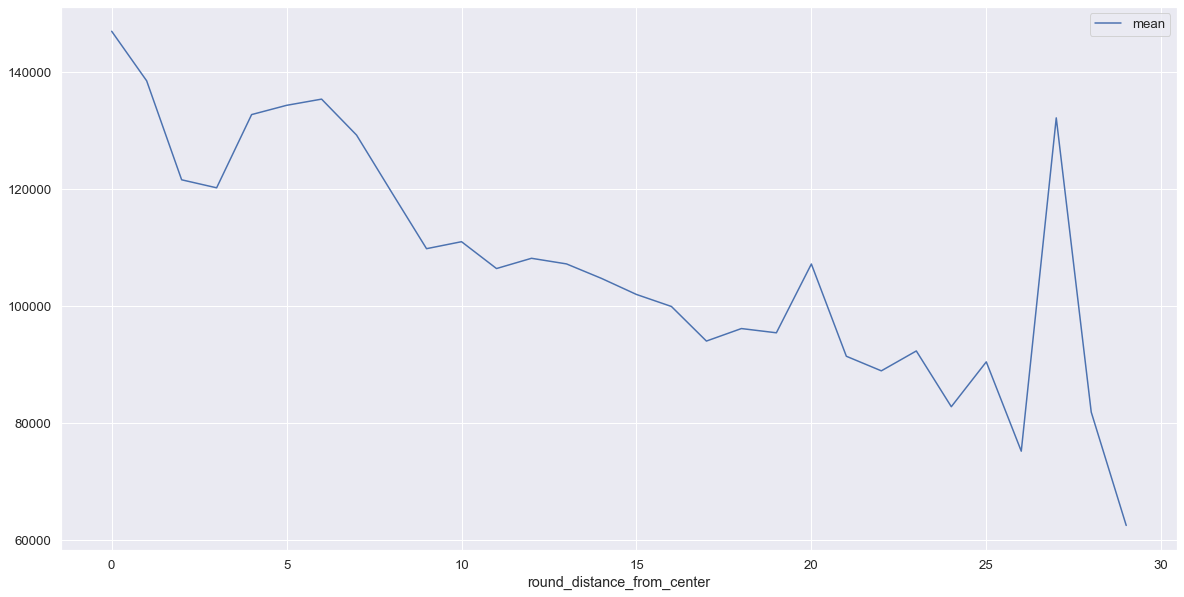

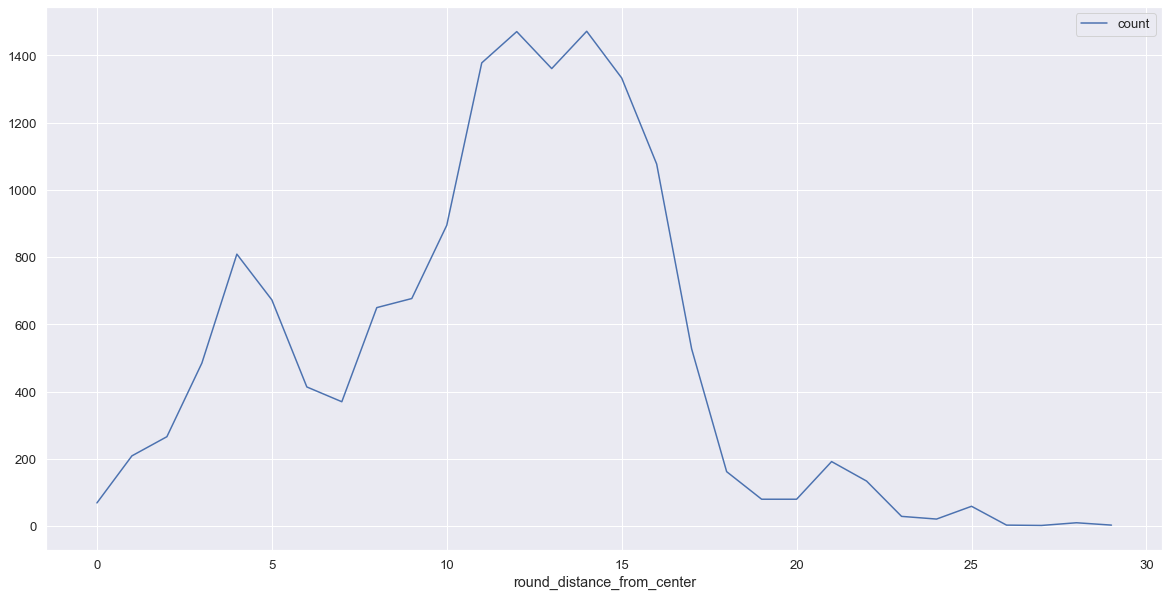

In [80]:
spb_start_data = start_data.query('locality_name == "Санкт-Петербург"')
spb_start_data.loc[:, 'round_distance_from_center'] = spb_start_data['cityCenters_nearest'] // 1000

spb_sqmp_per_km = spb_start_data.pivot_table(
    index='round_distance_from_center', 
    values='sq_meter_price', 
    aggfunc=('mean', 'median', 'count')
)

spb_sqmp_per_km.loc[:, 'round_distance_from_center'] = spb_sqmp_per_km.index

spb_sqmp_per_km.plot(x='round_distance_from_center', y='mean', figsize=(20,10), grid=True);
spb_sqmp_per_km.plot(x='round_distance_from_center', y='count', figsize=(20,10), grid=True);

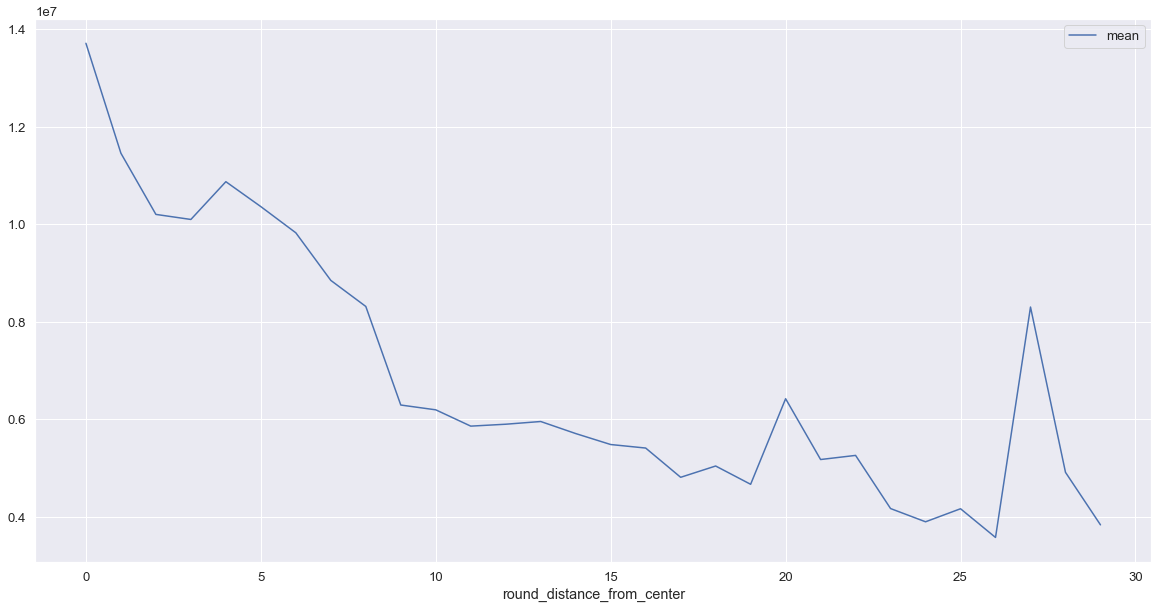

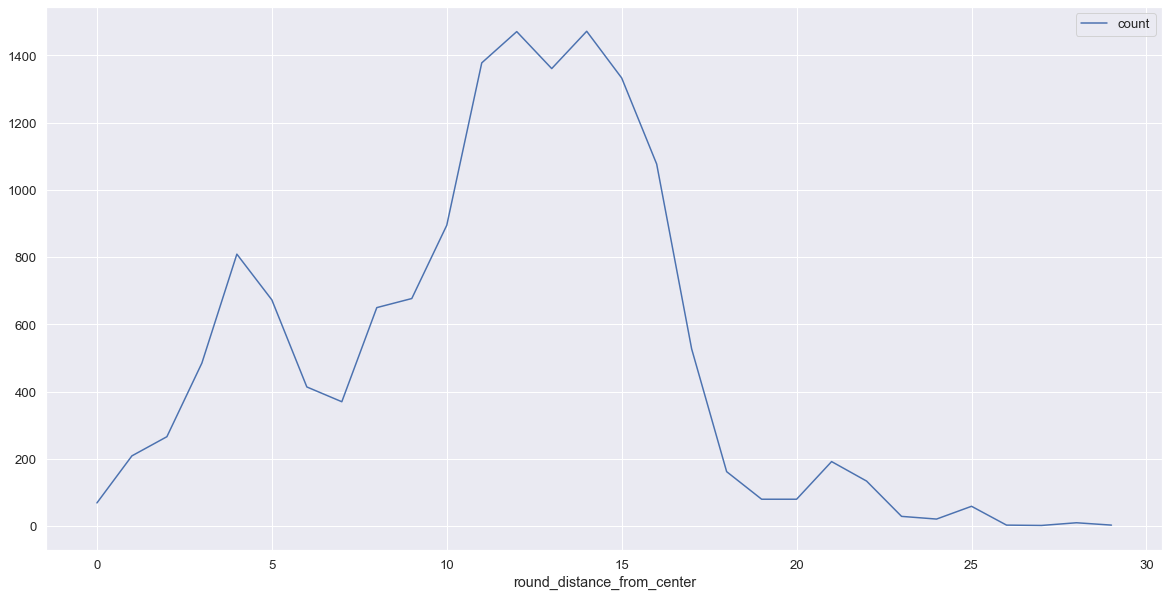

In [81]:
spb_start_data = start_data.query('locality_name == "Санкт-Петербург"')

spb_start_data.loc[:, 'round_distance_from_center'] = spb_start_data['cityCenters_nearest'] // 1000


spb_lp_per_km = spb_start_data.pivot_table(
    index='round_distance_from_center', 
    values='last_price', 
    aggfunc=('mean', 'median', 'count')
)

spb_lp_per_km.loc[:,'round_distance_from_center'] = spb_sqmp_per_km.index

spb_lp_per_km.plot(x='round_distance_from_center', y='mean', figsize=(20,10), grid=True);
spb_lp_per_km.plot(x='round_distance_from_center', y='count', figsize=(20,10), grid=True);

Исходя из анализа графика, видно, что цена за квадратный метр сильно меняется на удалении в 3-4 км от центра. Эту зону и будем счиать центральной. Эти данные немного смазаны тем, что в центре гораздо меньше квартир на продажу, в сравнении с тем, что происходит на удалении в 10-15 километров.

Сделаем срез таблицы и выделим квартиры, которые находятся в центре.

In [82]:
cityCenter_flats = start_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest <= 3000')
display(cityCenter_flats)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,cityCenters_nearest,days_exposition,living_to_total_ratio,kitchen_to_total_ratio,liv_plus_kit_to_tot_ratio,weekday,year,month,sq_meter_price,floor_ident
23,24,8,6500000.0,97.2,2015-10-31,2,2.60,3,46.500000,1,...,2336.0,265,0.478395,0.201646,0.680041,6 - Суббота,2015,10,66872.427984,Первый
97,99,32,9600000.0,90.0,2017-09-26,4,2.80,5,67.000000,2,...,2818.0,104,0.744444,0.088889,0.833333,2 - Вторник,2017,9,106666.666667,Другой
136,138,8,4800000.0,40.0,2017-11-18,2,2.60,3,29.000000,2,...,2913.0,80,0.725000,0.150000,0.875000,6 - Суббота,2017,11,120000.000000,Другой
176,179,5,14800000.0,108.7,2019-04-11,3,4.00,5,72.400000,5,...,2559.0,-1000,0.666053,0.073597,0.739650,4 - Четверг,2019,4,136154.553818,Последний
204,207,11,9000000.0,72.6,2018-09-08,2,2.90,5,43.200000,4,...,1645.0,-1000,0.595041,0.157025,0.752066,6 - Суббота,2018,9,123966.942149,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23020,23382,2,15000000.0,150.9,2016-07-04,4,3.67,4,98.200000,3,...,2180.0,455,0.650762,0.158383,0.809145,1 - Понедельник,2016,7,99403.578529,Другой
23025,23387,7,5600000.0,50.0,2017-08-21,1,2.64,5,27.000000,1,...,2659.0,45,0.540000,0.200000,0.740000,1 - Понедельник,2017,8,112000.000000,Первый
23036,23399,16,15300000.0,97.0,2017-01-11,3,3.50,7,61.400000,2,...,1463.0,391,0.632990,0.097938,0.730928,3 - Среда,2017,1,157731.958763,Другой
23236,23602,0,8700000.0,73.0,2019-01-23,3,2.65,4,46.001742,4,...,2345.0,34,0.630161,0.140264,0.770425,3 - Среда,2019,1,119178.082192,Последний


Нам надо проанализировать следующие параметры:
- площадь
- цена
- число комнат
- высота потолков

Сделаем список с этими колонками и посмотрим на каждый из параметров ближе.

total_area
count    544.000000
mean      88.285331
std       35.312886
min       20.000000
25%       63.300000
50%       82.050000
75%      107.550000
max      194.100000
Name: total_area, dtype: float64


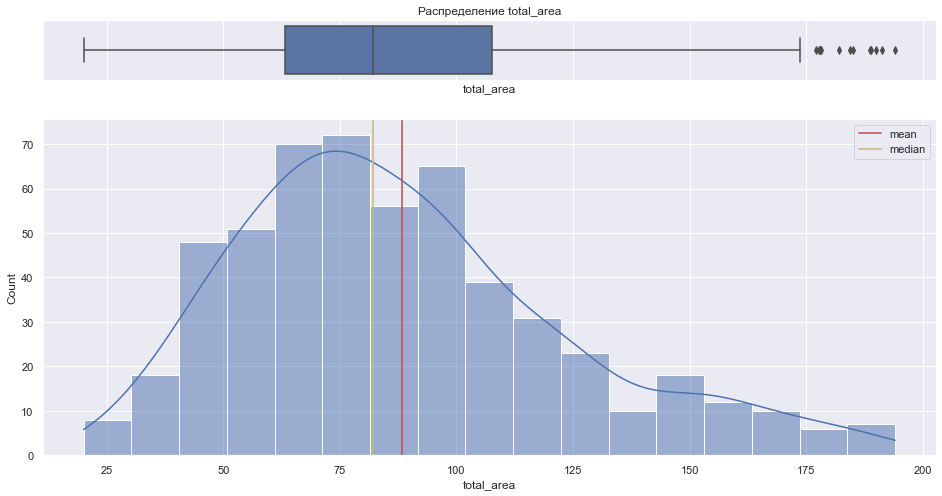

total_area
count    22744.000000
mean        57.462237
std         25.084660
min         13.000000
25%         40.000000
50%         51.400000
75%         68.000000
max        197.200000
Name: total_area, dtype: float64


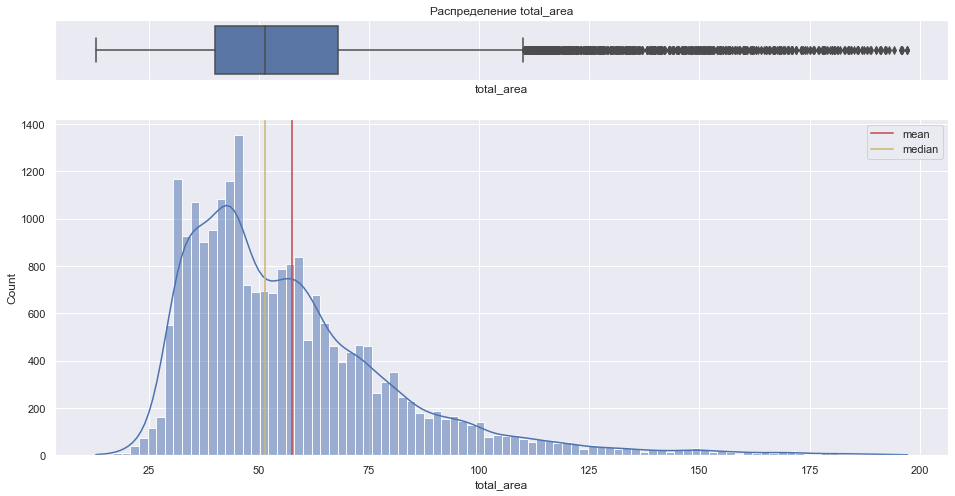

last_price
count    5.440000e+02
mean     1.112672e+07
std      5.647540e+06
min      2.385000e+06
25%      7.337500e+06
50%      9.500000e+06
75%      1.350500e+07
max      3.500000e+07
Name: last_price, dtype: float64


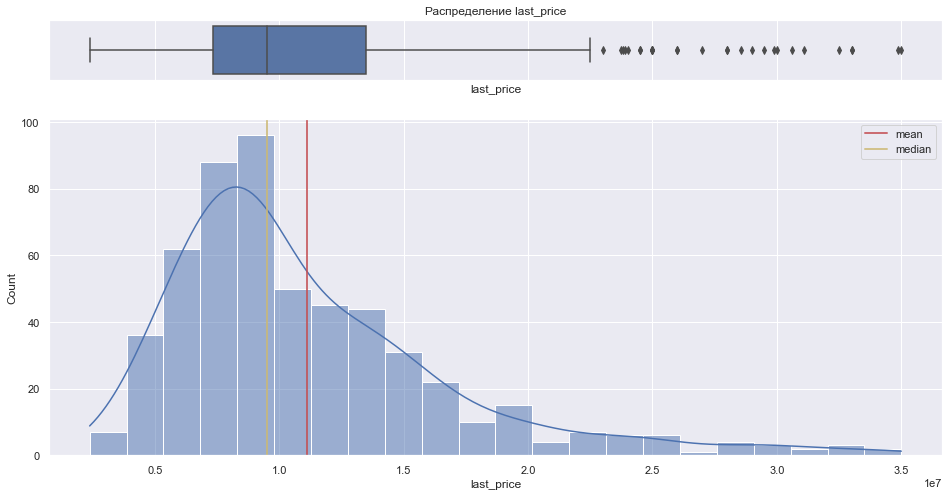

last_price
count    2.274400e+04
mean     5.709080e+06
std      4.058526e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      3.590000e+07
Name: last_price, dtype: float64


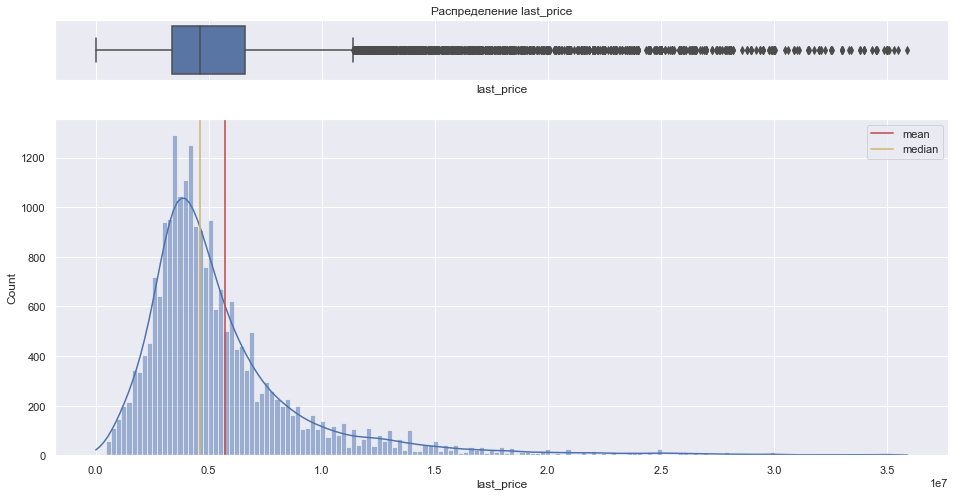

rooms
count    544.000000
mean       3.005515
std        1.279520
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       11.000000
Name: rooms, dtype: float64


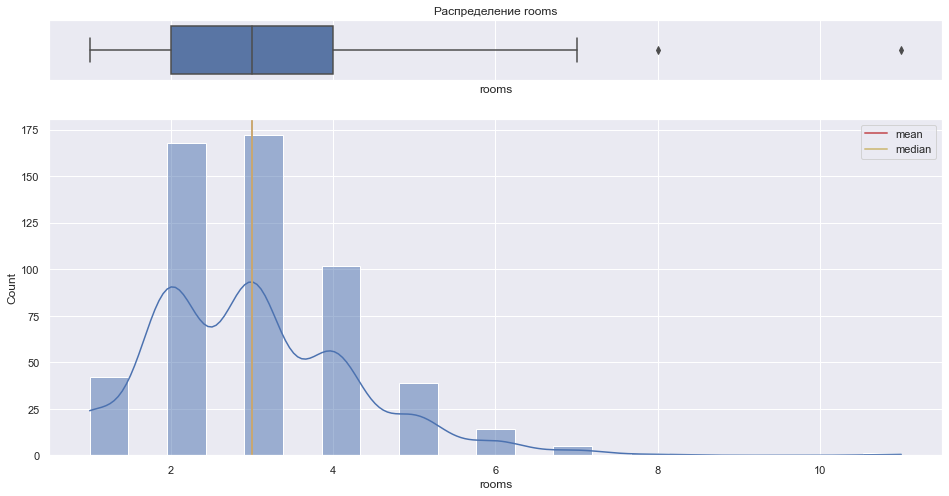

rooms
count    22744.000000
mean         2.040011
std          0.974448
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


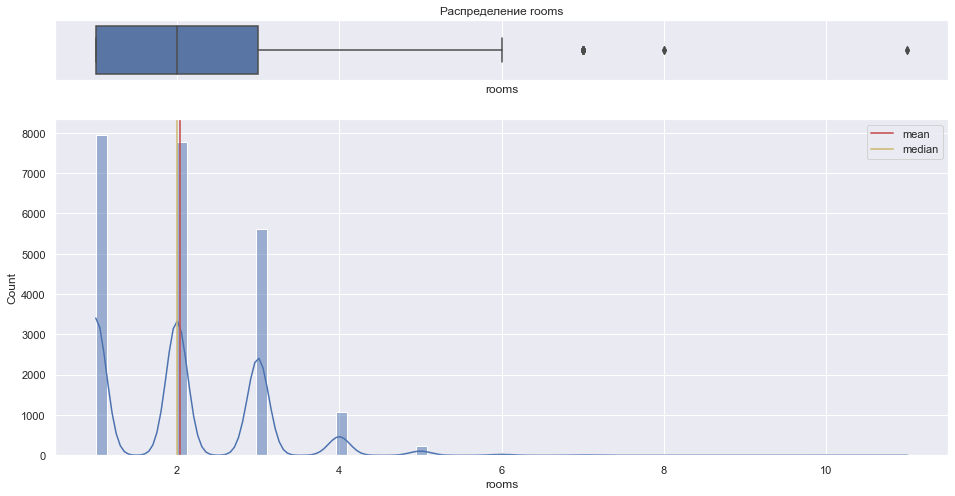

ceiling_height
count    544.000000
mean       3.071213
std        0.396771
min        2.500000
25%        2.700000
50%        3.000000
75%        3.300000
max        4.800000
Name: ceiling_height, dtype: float64


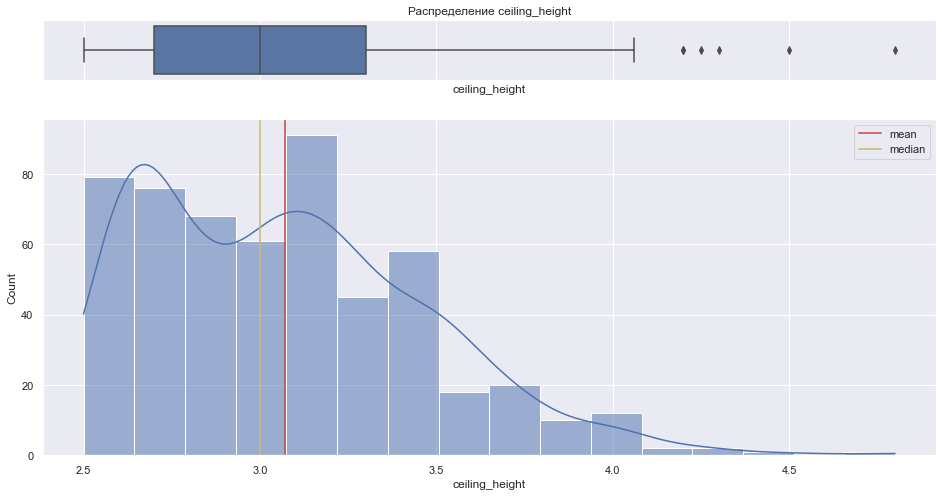

ceiling_height
count    22744.000000
mean         2.685201
std          0.207403
min          2.200000
25%          2.600000
50%          2.640000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64


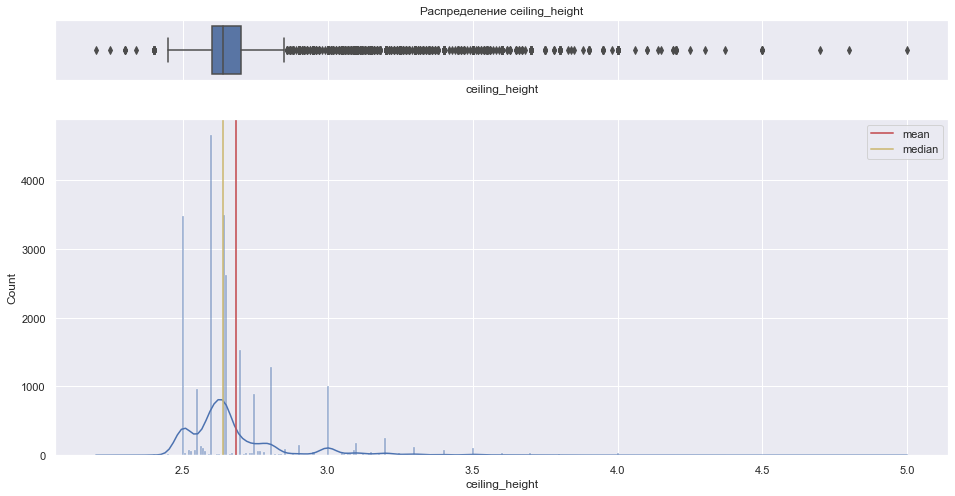

In [83]:
parametrs_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for column in parametrs_list:
    info_row(cityCenter_flats[column], cityCenter_flats)
    info_row(start_data[column], start_data)

Посмотрим как цена коррелируется с такими параметрами как:
- число комнат
- этаж
- удалённость от центра

In [84]:
correlation_list = ['rooms', 'floor', 'cityCenters_nearest']
for factor in correlation_list:
    print('Коэффициент корреляции между "{}" и "last_price" равен {:.2}'.format(
        factor,
        (cityCenter_flats[factor].corr(cityCenter_flats['last_price']))
    )
         )

Коэффициент корреляции между "rooms" и "last_price" равен 0.4
Коэффициент корреляции между "floor" и "last_price" равен 0.12
Коэффициент корреляции между "cityCenters_nearest" и "last_price" равен -0.24


In [85]:
correlation_list = ['rooms', 'floor', 'cityCenters_nearest']
for factor in correlation_list:
    print('Коэффициент корреляции между "{}" и "sq_meter_price" равен {:.2}'.format(
        factor,
        (cityCenter_flats[factor].corr(cityCenter_flats['sq_meter_price']))
    )
         )

Коэффициент корреляции между "rooms" и "sq_meter_price" равен -0.25
Коэффициент корреляции между "floor" и "sq_meter_price" равен -0.019
Коэффициент корреляции между "cityCenters_nearest" и "sq_meter_price" равен -0.19


Общая цена имеет корреляцию с количеством комнат для квартир в центре города, в то время как цена квадратного метра снижается с увеличением комнат. Этаж оказывает незначительное влияние как на общую цену, так и на цену за квадратный метр. 

При удалении от центра общая цена немного снижается, а вот цена за квадратный метр почти не меняется.

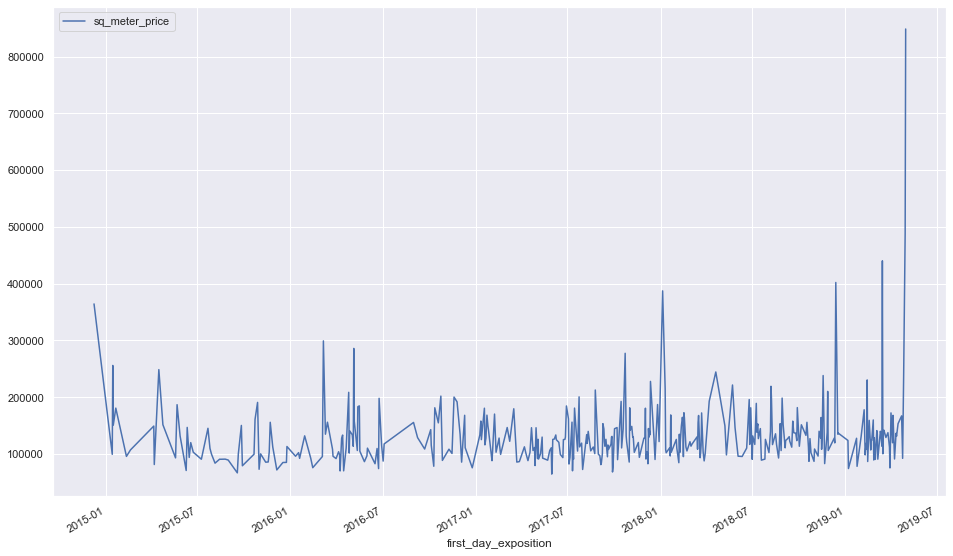

In [86]:
dependace_date_sqmp = cityCenter_flats.pivot_table(index='first_day_exposition', values='sq_meter_price')
dependace_date_sqmp.plot(figsize=(16,10));

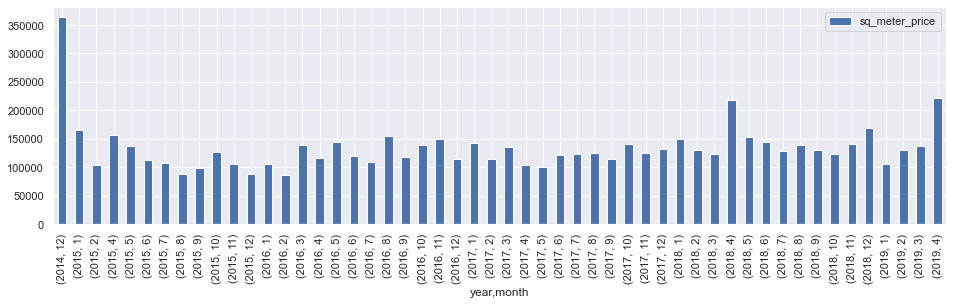

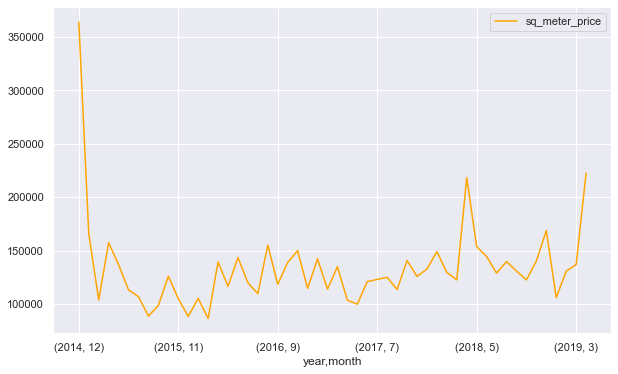

In [87]:
dependace_date_sqmp = cityCenter_flats.pivot_table(index=('year', 'month'), values='sq_meter_price')
dependace_date_sqmp.plot(kind='bar', figsize=(16,4));
dependace_date_sqmp.plot(color='orange', figsize=(10,6));

На втором графике видно, что общий тренд идет на увеличение стоимости за квадратный метр жилья. Иногда бывают локальные пики, которые скорее всего связанны с экономической обстановкой.

### Общий вывод

Для объективной оценки общего рынка недвижимости следует брать данные, которые будут содержать как можно больше информации по самым распространенным объектам на рынке. Поэтому нам пришлось отсечь все данные, которые составляли скорее выбросы и могли повлиять на выводы при анализе. 
Очищенные данные более репрезентативны и по ним мы можем сформулировать следующие выводы:
- Данные всегда требуют перепроверки. И те, которые вносит человек, и те, которые полученны автоматически
- Цена за квадратный метр уменьшается с ростом площади продаваемого помещения
- Крайние этажи (первый, последний) стоят дешевле
- Анализ временных данных показывает, что есть общий тренд на рост цены на недвижимость, с локальными просадками и скачками
- Очистка данных занимает очень много времени
- Не все данные требуется заполнять. Пропуски бывают значимы не меньше.
